In [1]:
import networkx as nx # version 2.2
import matplotlib.pyplot as plt
import re
import random
import operator #to sort elements in a list of tuples
import itertools
import math
import numpy as np
import os
import sys
    
import Cascade_generation_functions as C_gen
import Init_NetInf
import Greedy_NetInf as Greed

In [2]:
'''
Global variables
'''

EPS = 1e-64 #zero machine
ALPHA = 1.0 #Incubation parameter (for exp and power law)
MODEL = 0 # 0 = exp law, 1 = power law (power law is not fully implemented yet)
MAX = sys.float_info.max #Max value of a float in python
#MIN = sys.float_info.min #Min value of a float in python
MIN = -MAX

#(works only if groundtruth is available)
#When set to True (especially boundOn) it slow down greatly the computation
compare_groud_truth = False # If set to True outputs some aditional information (precision and recall of the algo)
boundOn = False


greedy_global_param = (ALPHA,MODEL,MAX,MIN,EPS,compare_groud_truth,boundOn)
'''
Model generation parameter
'''
beta = 0.5 # proba of an edge propagating the infection
alpha = 1.0 #incubation time param (for exp law and power law)
window = 100 #max time duration of a cascade
model = 0 # 0 = exp law, 1 = power law


In [3]:
'''
Generation and save of ground truth
'''
file_name = "cascade_variation_4"
nb_vertex,nb_edge = (1024,1446)
G_true = C_gen.Generate_random_graph(nb_vertex,nb_edge)
dir_name = "Gen_"+file_name
dir_path = "./Generation_files/"+dir_name
os.mkdir(dir_path)
G_name = "G_true_"+file_name+".txt"
G_file = dir_path + "/" + G_name
C_gen.Save_graph_to_file(G_file,G_true)

In [4]:
precision_dic = {}
recall_dic = {}
nb_max_edges_list = [100,300,500,800,1000,1446]
for i in range (1,31) :
    print(i)
    nb_cascades = -i*100 #- signe here for convention
    cascades = C_gen.Generate_all_cascades(G_true,nb_cascades,beta,alpha,window,model)
    C_name = "C_"+str(-nb_cascades)+".txt"
    C_file = dir_path+"/"+C_name
    C_gen.Save_cascade_to_file(C_file,cascades,G_true)
    precision_data = []
    recall_data = []
    for nb_max_edges in nb_max_edges_list :
        print(nb_max_edges)
        correct = 0
        G_star,DAG_Tree_c_dic,cascades_per_edge_dic,edge_gain_dic = Init_NetInf.Init(C_file,EPS,MAX)
        print("number of edges is : ", len(edge_gain_dic))
        G_max,precisiom,recall,edge_info = Greed.GreedyOpt(nb_max_edges,DAG_Tree_c_dic,cascades_per_edge_dic,edge_gain_dic,G_star,G_true,greedy_global_param)
        G_max_file_name = dir_path+"/G_max_" + str(-nb_cascades)+"_nb_edges"+str(nb_max_edges)+".txt"
        C_gen.Save_graph_to_file(G_max_file_name,G_max)
        for edge in G_max.edges():
            if edge in G_true.edges():
                correct +=1
        precision = correct/G_max.number_of_edges()
        recall = correct/G_true.number_of_edges()
        precision_data.append(precision)
        recall_data.append(recall)
    precision_dic[i] = precision_data
    recall_dic[i] = recall_data

1
100
All nodes were read
number of edges is :  5269
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
itter

itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration

itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration

itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration

itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration

itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration

itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration

itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration

itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration

itteration :  799
itteration :  800
itteration :  801
itteration :  802
itteration :  803
itteration :  804
itteration :  805
itteration :  806
itteration :  807
itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration :  828
itteration :  829
itteration :  830
itteration :  831
itteration :  832
itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration :  837
itteration :  838
itteration :  839
itteration :  840
itteration :  841
itteration :  842
itteration :  843
itteration :  844
itteration :  845
itteration :  846
itteration :  847
itteration :  848
itteration :  849
itteration :  850
itteration :  851
itteration :  852
itteration :  853
itteration

itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration :  417
itteration :  418
itteration :  419
itteration :  420
itteration :  421
itteration :  422
itteration :  423
itteration :  424
itteration :  425
itteration :  426
itteration :  427
itteration :  428
itteration :  429
itteration :  430
itteration :  431
itteration :  432
itteration :  433
itteration :  434
itteration

itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
itteration :  56
itteration :  57
itteration :  58
itteration :  59
ittera

itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration

itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration

itteration :  763
itteration :  764
itteration :  765
itteration :  766
itteration :  767
itteration :  768
itteration :  769
itteration :  770
itteration :  771
itteration :  772
itteration :  773
itteration :  774
itteration :  775
itteration :  776
itteration :  777
itteration :  778
itteration :  779
itteration :  780
itteration :  781
itteration :  782
itteration :  783
itteration :  784
itteration :  785
itteration :  786
itteration :  787
itteration :  788
itteration :  789
itteration :  790
itteration :  791
itteration :  792
itteration :  793
itteration :  794
itteration :  795
itteration :  796
itteration :  797
itteration :  798
itteration :  799
1000
All nodes were read
number of edges is :  8205
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itt

itteration :  500
itteration :  501
itteration :  502
itteration :  503
itteration :  504
itteration :  505
itteration :  506
itteration :  507
itteration :  508
itteration :  509
itteration :  510
itteration :  511
itteration :  512
itteration :  513
itteration :  514
itteration :  515
itteration :  516
itteration :  517
itteration :  518
itteration :  519
itteration :  520
itteration :  521
itteration :  522
itteration :  523
itteration :  524
itteration :  525
itteration :  526
itteration :  527
itteration :  528
itteration :  529
itteration :  530
itteration :  531
itteration :  532
itteration :  533
itteration :  534
itteration :  535
itteration :  536
itteration :  537
itteration :  538
itteration :  539
itteration :  540
itteration :  541
itteration :  542
itteration :  543
itteration :  544
itteration :  545
itteration :  546
itteration :  547
itteration :  548
itteration :  549
itteration :  550
itteration :  551
itteration :  552
itteration :  553
itteration :  554
itteration

itteration :  999
1446
All nodes were read
number of edges is :  8205
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itter

itteration :  496
itteration :  497
itteration :  498
itteration :  499
itteration :  500
itteration :  501
itteration :  502
itteration :  503
itteration :  504
itteration :  505
itteration :  506
itteration :  507
itteration :  508
itteration :  509
itteration :  510
itteration :  511
itteration :  512
itteration :  513
itteration :  514
itteration :  515
itteration :  516
itteration :  517
itteration :  518
itteration :  519
itteration :  520
itteration :  521
itteration :  522
itteration :  523
itteration :  524
itteration :  525
itteration :  526
itteration :  527
itteration :  528
itteration :  529
itteration :  530
itteration :  531
itteration :  532
itteration :  533
itteration :  534
itteration :  535
itteration :  536
itteration :  537
itteration :  538
itteration :  539
itteration :  540
itteration :  541
itteration :  542
itteration :  543
itteration :  544
itteration :  545
itteration :  546
itteration :  547
itteration :  548
itteration :  549
itteration :  550
itteration

itteration :  995
itteration :  996
itteration :  997
itteration :  998
itteration :  999
itteration :  1000
itteration :  1001
itteration :  1002
itteration :  1003
itteration :  1004
itteration :  1005
itteration :  1006
itteration :  1007
itteration :  1008
itteration :  1009
itteration :  1010
itteration :  1011
itteration :  1012
itteration :  1013
itteration :  1014
itteration :  1015
itteration :  1016
itteration :  1017
itteration :  1018
itteration :  1019
itteration :  1020
itteration :  1021
itteration :  1022
itteration :  1023
itteration :  1024
itteration :  1025
itteration :  1026
itteration :  1027
itteration :  1028
itteration :  1029
itteration :  1030
itteration :  1031
itteration :  1032
itteration :  1033
itteration :  1034
itteration :  1035
itteration :  1036
itteration :  1037
itteration :  1038
itteration :  1039
itteration :  1040
itteration :  1041
itteration :  1042
itteration :  1043
itteration :  1044
itteration :  1045
itteration :  1046
itteration :  104

itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
500
All nodes were read
number of edges is :  11977
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration 

800
All nodes were read
number of edges is :  11977
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
ittera

itteration :  536
itteration :  537
itteration :  538
itteration :  539
itteration :  540
itteration :  541
itteration :  542
itteration :  543
itteration :  544
itteration :  545
itteration :  546
itteration :  547
itteration :  548
itteration :  549
itteration :  550
itteration :  551
itteration :  552
itteration :  553
itteration :  554
itteration :  555
itteration :  556
itteration :  557
itteration :  558
itteration :  559
itteration :  560
itteration :  561
itteration :  562
itteration :  563
itteration :  564
itteration :  565
itteration :  566
itteration :  567
itteration :  568
itteration :  569
itteration :  570
itteration :  571
itteration :  572
itteration :  573
itteration :  574
itteration :  575
itteration :  576
itteration :  577
itteration :  578
itteration :  579
itteration :  580
itteration :  581
itteration :  582
itteration :  583
itteration :  584
itteration :  585
itteration :  586
itteration :  587
itteration :  588
itteration :  589
itteration :  590
itteration

itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration

itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration :  828
itteration :  829
itteration :  830
itteration :  831
itteration :  832
itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration :  837
itteration :  838
itteration :  839
itteration :  840
itteration :  841
itteration :  842
itteration :  843
itteration :  844
itteration :  845
itteration :  846
itteration :  847
itteration :  848
itteration :  849
itteration :  850
itteration :  851
itteration :  852
itteration :  853
itteration :  854
itteration :  855
itteration :  856
itteration :  857
itteration :  858
itteration :  859
itteration :  860
itteration :  861
itteration :  862
itteration :  863
itteration :  864
itteration :  865
itteration :  866
itteration :  867
itteration :  868
itteration :  869
itteration

itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration

itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration :  828
itteration :  829
itteration :  830
itteration :  831
itteration :  832
itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration :  837
itteration :  838
itteration :  839
itteration :  840
itteration :  841
itteration :  842
itteration :  843
itteration :  844
itteration :  845
itteration :  846
itteration :  847
itteration :  848
itteration :  849
itteration :  850
itteration :  851
itteration :  852
itteration :  853
itteration :  854
itteration :  855
itteration :  856
itteration :  857
itteration :  858
itteration :  859
itteration :  860
itteration :  861
itteration :  862
itteration

itteration :  1379
itteration :  1380
itteration :  1381
itteration :  1382
itteration :  1383
itteration :  1384
itteration :  1385
itteration :  1386
itteration :  1387
itteration :  1388
itteration :  1389
itteration :  1390
itteration :  1391
itteration :  1392
itteration :  1393
itteration :  1394
itteration :  1395
itteration :  1396
itteration :  1397
itteration :  1398
itteration :  1399
itteration :  1400
itteration :  1401
itteration :  1402
itteration :  1403
itteration :  1404
itteration :  1405
itteration :  1406
itteration :  1407
itteration :  1408
itteration :  1409
itteration :  1410
itteration :  1411
itteration :  1412
itteration :  1413
itteration :  1414
itteration :  1415
itteration :  1416
itteration :  1417
itteration :  1418
itteration :  1419
itteration :  1420
itteration :  1421
itteration :  1422
itteration :  1423
itteration :  1424
itteration :  1425
itteration :  1426
itteration :  1427
itteration :  1428
itteration :  1429
itteration :  1430
itteration :

itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
itteration :  56
itteration :  57
itteration :  58
itteration :  59
ittera

800
All nodes were read
number of edges is :  13197
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
ittera

itteration :  513
itteration :  514
itteration :  515
itteration :  516
itteration :  517
itteration :  518
itteration :  519
itteration :  520
itteration :  521
itteration :  522
itteration :  523
itteration :  524
itteration :  525
itteration :  526
itteration :  527
itteration :  528
itteration :  529
itteration :  530
itteration :  531
itteration :  532
itteration :  533
itteration :  534
itteration :  535
itteration :  536
itteration :  537
itteration :  538
itteration :  539
itteration :  540
itteration :  541
itteration :  542
itteration :  543
itteration :  544
itteration :  545
itteration :  546
itteration :  547
itteration :  548
itteration :  549
itteration :  550
itteration :  551
itteration :  552
itteration :  553
itteration :  554
itteration :  555
itteration :  556
itteration :  557
itteration :  558
itteration :  559
itteration :  560
itteration :  561
itteration :  562
itteration :  563
itteration :  564
itteration :  565
itteration :  566
itteration :  567
itteration

itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration

itteration :  719
itteration :  720
itteration :  721
itteration :  722
itteration :  723
itteration :  724
itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration :  733
itteration :  734
itteration :  735
itteration :  736
itteration :  737
itteration :  738
itteration :  739
itteration :  740
itteration :  741
itteration :  742
itteration :  743
itteration :  744
itteration :  745
itteration :  746
itteration :  747
itteration :  748
itteration :  749
itteration :  750
itteration :  751
itteration :  752
itteration :  753
itteration :  754
itteration :  755
itteration :  756
itteration :  757
itteration :  758
itteration :  759
itteration :  760
itteration :  761
itteration :  762
itteration :  763
itteration :  764
itteration :  765
itteration :  766
itteration :  767
itteration :  768
itteration :  769
itteration :  770
itteration :  771
itteration :  772
itteration :  773
itteration

itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration

itteration :  715
itteration :  716
itteration :  717
itteration :  718
itteration :  719
itteration :  720
itteration :  721
itteration :  722
itteration :  723
itteration :  724
itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration :  733
itteration :  734
itteration :  735
itteration :  736
itteration :  737
itteration :  738
itteration :  739
itteration :  740
itteration :  741
itteration :  742
itteration :  743
itteration :  744
itteration :  745
itteration :  746
itteration :  747
itteration :  748
itteration :  749
itteration :  750
itteration :  751
itteration :  752
itteration :  753
itteration :  754
itteration :  755
itteration :  756
itteration :  757
itteration :  758
itteration :  759
itteration :  760
itteration :  761
itteration :  762
itteration :  763
itteration :  764
itteration :  765
itteration :  766
itteration :  767
itteration :  768
itteration :  769
itteration

itteration :  1214
itteration :  1215
itteration :  1216
itteration :  1217
itteration :  1218
itteration :  1219
itteration :  1220
itteration :  1221
itteration :  1222
itteration :  1223
itteration :  1224
itteration :  1225
itteration :  1226
itteration :  1227
itteration :  1228
itteration :  1229
itteration :  1230
itteration :  1231
itteration :  1232
itteration :  1233
itteration :  1234
itteration :  1235
itteration :  1236
itteration :  1237
itteration :  1238
itteration :  1239
itteration :  1240
itteration :  1241
itteration :  1242
itteration :  1243
itteration :  1244
itteration :  1245
itteration :  1246
itteration :  1247
itteration :  1248
itteration :  1249
itteration :  1250
itteration :  1251
itteration :  1252
itteration :  1253
itteration :  1254
itteration :  1255
itteration :  1256
itteration :  1257
itteration :  1258
itteration :  1259
itteration :  1260
itteration :  1261
itteration :  1262
itteration :  1263
itteration :  1264
itteration :  1265
itteration :

itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration :  215
itteration :  216
itteration

itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration

itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration

itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration

itteration :  800
itteration :  801
itteration :  802
itteration :  803
itteration :  804
itteration :  805
itteration :  806
itteration :  807
itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration :  828
itteration :  829
itteration :  830
itteration :  831
itteration :  832
itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration :  837
itteration :  838
itteration :  839
itteration :  840
itteration :  841
itteration :  842
itteration :  843
itteration :  844
itteration :  845
itteration :  846
itteration :  847
itteration :  848
itteration :  849
itteration :  850
itteration :  851
itteration :  852
itteration :  853
itteration :  854
itteration

itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration

itteration :  800
itteration :  801
itteration :  802
itteration :  803
itteration :  804
itteration :  805
itteration :  806
itteration :  807
itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration :  828
itteration :  829
itteration :  830
itteration :  831
itteration :  832
itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration :  837
itteration :  838
itteration :  839
itteration :  840
itteration :  841
itteration :  842
itteration :  843
itteration :  844
itteration :  845
itteration :  846
itteration :  847
itteration :  848
itteration :  849
itteration :  850
itteration :  851
itteration :  852
itteration :  853
itteration :  854
itteration

itteration :  1299
itteration :  1300
itteration :  1301
itteration :  1302
itteration :  1303
itteration :  1304
itteration :  1305
itteration :  1306
itteration :  1307
itteration :  1308
itteration :  1309
itteration :  1310
itteration :  1311
itteration :  1312
itteration :  1313
itteration :  1314
itteration :  1315
itteration :  1316
itteration :  1317
itteration :  1318
itteration :  1319
itteration :  1320
itteration :  1321
itteration :  1322
itteration :  1323
itteration :  1324
itteration :  1325
itteration :  1326
itteration :  1327
itteration :  1328
itteration :  1329
itteration :  1330
itteration :  1331
itteration :  1332
itteration :  1333
itteration :  1334
itteration :  1335
itteration :  1336
itteration :  1337
itteration :  1338
itteration :  1339
itteration :  1340
itteration :  1341
itteration :  1342
itteration :  1343
itteration :  1344
itteration :  1345
itteration :  1346
itteration :  1347
itteration :  1348
itteration :  1349
itteration :  1350
itteration :

itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
500
All nodes were read
number of edges is :  17276
itteration :

itteration :  445
itteration :  446
itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
800
All no

itteration :  442
itteration :  443
itteration :  444
itteration :  445
itteration :  446
itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration

itteration :  139
itteration :  140
itteration :  141
itteration :  142
itteration :  143
itteration :  144
itteration :  145
itteration :  146
itteration :  147
itteration :  148
itteration :  149
itteration :  150
itteration :  151
itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration

itteration :  639
itteration :  640
itteration :  641
itteration :  642
itteration :  643
itteration :  644
itteration :  645
itteration :  646
itteration :  647
itteration :  648
itteration :  649
itteration :  650
itteration :  651
itteration :  652
itteration :  653
itteration :  654
itteration :  655
itteration :  656
itteration :  657
itteration :  658
itteration :  659
itteration :  660
itteration :  661
itteration :  662
itteration :  663
itteration :  664
itteration :  665
itteration :  666
itteration :  667
itteration :  668
itteration :  669
itteration :  670
itteration :  671
itteration :  672
itteration :  673
itteration :  674
itteration :  675
itteration :  676
itteration :  677
itteration :  678
itteration :  679
itteration :  680
itteration :  681
itteration :  682
itteration :  683
itteration :  684
itteration :  685
itteration :  686
itteration :  687
itteration :  688
itteration :  689
itteration :  690
itteration :  691
itteration :  692
itteration :  693
itteration

itteration :  136
itteration :  137
itteration :  138
itteration :  139
itteration :  140
itteration :  141
itteration :  142
itteration :  143
itteration :  144
itteration :  145
itteration :  146
itteration :  147
itteration :  148
itteration :  149
itteration :  150
itteration :  151
itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration

itteration :  635
itteration :  636
itteration :  637
itteration :  638
itteration :  639
itteration :  640
itteration :  641
itteration :  642
itteration :  643
itteration :  644
itteration :  645
itteration :  646
itteration :  647
itteration :  648
itteration :  649
itteration :  650
itteration :  651
itteration :  652
itteration :  653
itteration :  654
itteration :  655
itteration :  656
itteration :  657
itteration :  658
itteration :  659
itteration :  660
itteration :  661
itteration :  662
itteration :  663
itteration :  664
itteration :  665
itteration :  666
itteration :  667
itteration :  668
itteration :  669
itteration :  670
itteration :  671
itteration :  672
itteration :  673
itteration :  674
itteration :  675
itteration :  676
itteration :  677
itteration :  678
itteration :  679
itteration :  680
itteration :  681
itteration :  682
itteration :  683
itteration :  684
itteration :  685
itteration :  686
itteration :  687
itteration :  688
itteration :  689
itteration

itteration :  1131
itteration :  1132
itteration :  1133
itteration :  1134
itteration :  1135
itteration :  1136
itteration :  1137
itteration :  1138
itteration :  1139
itteration :  1140
itteration :  1141
itteration :  1142
itteration :  1143
itteration :  1144
itteration :  1145
itteration :  1146
itteration :  1147
itteration :  1148
itteration :  1149
itteration :  1150
itteration :  1151
itteration :  1152
itteration :  1153
itteration :  1154
itteration :  1155
itteration :  1156
itteration :  1157
itteration :  1158
itteration :  1159
itteration :  1160
itteration :  1161
itteration :  1162
itteration :  1163
itteration :  1164
itteration :  1165
itteration :  1166
itteration :  1167
itteration :  1168
itteration :  1169
itteration :  1170
itteration :  1171
itteration :  1172
itteration :  1173
itteration :  1174
itteration :  1175
itteration :  1176
itteration :  1177
itteration :  1178
itteration :  1179
itteration :  1180
itteration :  1181
itteration :  1182
itteration :

itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
itteration :  56
itteration :  57
itteration :  58
itteration :  59
ittera

itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
itteration :  56
itteration :  57
itteration :  58
itteration :  59
ittera

itteration :  528
itteration :  529
itteration :  530
itteration :  531
itteration :  532
itteration :  533
itteration :  534
itteration :  535
itteration :  536
itteration :  537
itteration :  538
itteration :  539
itteration :  540
itteration :  541
itteration :  542
itteration :  543
itteration :  544
itteration :  545
itteration :  546
itteration :  547
itteration :  548
itteration :  549
itteration :  550
itteration :  551
itteration :  552
itteration :  553
itteration :  554
itteration :  555
itteration :  556
itteration :  557
itteration :  558
itteration :  559
itteration :  560
itteration :  561
itteration :  562
itteration :  563
itteration :  564
itteration :  565
itteration :  566
itteration :  567
itteration :  568
itteration :  569
itteration :  570
itteration :  571
itteration :  572
itteration :  573
itteration :  574
itteration :  575
itteration :  576
itteration :  577
itteration :  578
itteration :  579
itteration :  580
itteration :  581
itteration :  582
itteration

itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration

itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration :  733
itteration :  734
itteration :  735
itteration :  736
itteration :  737
itteration :  738
itteration :  739
itteration :  740
itteration :  741
itteration :  742
itteration :  743
itteration :  744
itteration :  745
itteration :  746
itteration :  747
itteration :  748
itteration :  749
itteration :  750
itteration :  751
itteration :  752
itteration :  753
itteration :  754
itteration :  755
itteration :  756
itteration :  757
itteration :  758
itteration :  759
itteration :  760
itteration :  761
itteration :  762
itteration :  763
itteration :  764
itteration :  765
itteration :  766
itteration :  767
itteration :  768
itteration :  769
itteration :  770
itteration :  771
itteration :  772
itteration :  773
itteration :  774
itteration :  775
itteration :  776
itteration :  777
itteration :  778
itteration :  779
itteration

itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration

itteration :  721
itteration :  722
itteration :  723
itteration :  724
itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration :  733
itteration :  734
itteration :  735
itteration :  736
itteration :  737
itteration :  738
itteration :  739
itteration :  740
itteration :  741
itteration :  742
itteration :  743
itteration :  744
itteration :  745
itteration :  746
itteration :  747
itteration :  748
itteration :  749
itteration :  750
itteration :  751
itteration :  752
itteration :  753
itteration :  754
itteration :  755
itteration :  756
itteration :  757
itteration :  758
itteration :  759
itteration :  760
itteration :  761
itteration :  762
itteration :  763
itteration :  764
itteration :  765
itteration :  766
itteration :  767
itteration :  768
itteration :  769
itteration :  770
itteration :  771
itteration :  772
itteration :  773
itteration :  774
itteration :  775
itteration

itteration :  1191
itteration :  1192
itteration :  1193
itteration :  1194
itteration :  1195
itteration :  1196
itteration :  1197
itteration :  1198
itteration :  1199
itteration :  1200
itteration :  1201
itteration :  1202
itteration :  1203
itteration :  1204
itteration :  1205
itteration :  1206
itteration :  1207
itteration :  1208
itteration :  1209
itteration :  1210
itteration :  1211
itteration :  1212
itteration :  1213
itteration :  1214
itteration :  1215
itteration :  1216
itteration :  1217
itteration :  1218
itteration :  1219
itteration :  1220
itteration :  1221
itteration :  1222
itteration :  1223
itteration :  1224
itteration :  1225
itteration :  1226
itteration :  1227
itteration :  1228
itteration :  1229
itteration :  1230
itteration :  1231
itteration :  1232
itteration :  1233
itteration :  1234
itteration :  1235
itteration :  1236
itteration :  1237
itteration :  1238
itteration :  1239
itteration :  1240
itteration :  1241
itteration :  1242
itteration :

itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration

itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration :  417
itteration :  418
itteration :  419
itteration :  420
itteration :  421
itteration

itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration :  417
itteration :  418
itteration

itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration

itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration :  828
itteration :  829
itteration :  830
itteration :  831
itteration :  832
itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration :  837
itteration :  838
itteration :  839
itteration :  840
itteration :  841
itteration :  842
itteration :  843
itteration :  844
itteration :  845
itteration :  846
itteration :  847
itteration :  848
itteration :  849
itteration :  850
itteration :  851
itteration :  852
itteration :  853
itteration :  854
itteration :  855
itteration :  856
itteration :  857
itteration :  858
itteration :  859
itteration :  860
itteration :  861
itteration :  862
itteration :  863
itteration :  864
itteration :  865
itteration

itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration

itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration :  828
itteration :  829
itteration :  830
itteration :  831
itteration :  832
itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration :  837
itteration :  838
itteration :  839
itteration :  840
itteration :  841
itteration :  842
itteration :  843
itteration :  844
itteration :  845
itteration :  846
itteration :  847
itteration :  848
itteration :  849
itteration :  850
itteration :  851
itteration :  852
itteration :  853
itteration :  854
itteration :  855
itteration :  856
itteration :  857
itteration :  858
itteration :  859
itteration :  860
itteration :  861
itteration :  862
itteration

itteration :  1307
itteration :  1308
itteration :  1309
itteration :  1310
itteration :  1311
itteration :  1312
itteration :  1313
itteration :  1314
itteration :  1315
itteration :  1316
itteration :  1317
itteration :  1318
itteration :  1319
itteration :  1320
itteration :  1321
itteration :  1322
itteration :  1323
itteration :  1324
itteration :  1325
itteration :  1326
itteration :  1327
itteration :  1328
itteration :  1329
itteration :  1330
itteration :  1331
itteration :  1332
itteration :  1333
itteration :  1334
itteration :  1335
itteration :  1336
itteration :  1337
itteration :  1338
itteration :  1339
itteration :  1340
itteration :  1341
itteration :  1342
itteration :  1343
itteration :  1344
itteration :  1345
itteration :  1346
itteration :  1347
itteration :  1348
itteration :  1349
itteration :  1350
itteration :  1351
itteration :  1352
itteration :  1353
itteration :  1354
itteration :  1355
itteration :  1356
itteration :  1357
itteration :  1358
itteration :

itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
500
All nodes were read
number of edges is :  16750
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :

itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
800
All nodes were read
number of edges is :  16750
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
ittera

itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
itteration :  500
itteration :  501
itteration :  502
itteration :  503
itteration :  504
itteration

itteration :  148
itteration :  149
itteration :  150
itteration :  151
itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration

itteration :  647
itteration :  648
itteration :  649
itteration :  650
itteration :  651
itteration :  652
itteration :  653
itteration :  654
itteration :  655
itteration :  656
itteration :  657
itteration :  658
itteration :  659
itteration :  660
itteration :  661
itteration :  662
itteration :  663
itteration :  664
itteration :  665
itteration :  666
itteration :  667
itteration :  668
itteration :  669
itteration :  670
itteration :  671
itteration :  672
itteration :  673
itteration :  674
itteration :  675
itteration :  676
itteration :  677
itteration :  678
itteration :  679
itteration :  680
itteration :  681
itteration :  682
itteration :  683
itteration :  684
itteration :  685
itteration :  686
itteration :  687
itteration :  688
itteration :  689
itteration :  690
itteration :  691
itteration :  692
itteration :  693
itteration :  694
itteration :  695
itteration :  696
itteration :  697
itteration :  698
itteration :  699
itteration :  700
itteration :  701
itteration

itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration

itteration :  644
itteration :  645
itteration :  646
itteration :  647
itteration :  648
itteration :  649
itteration :  650
itteration :  651
itteration :  652
itteration :  653
itteration :  654
itteration :  655
itteration :  656
itteration :  657
itteration :  658
itteration :  659
itteration :  660
itteration :  661
itteration :  662
itteration :  663
itteration :  664
itteration :  665
itteration :  666
itteration :  667
itteration :  668
itteration :  669
itteration :  670
itteration :  671
itteration :  672
itteration :  673
itteration :  674
itteration :  675
itteration :  676
itteration :  677
itteration :  678
itteration :  679
itteration :  680
itteration :  681
itteration :  682
itteration :  683
itteration :  684
itteration :  685
itteration :  686
itteration :  687
itteration :  688
itteration :  689
itteration :  690
itteration :  691
itteration :  692
itteration :  693
itteration :  694
itteration :  695
itteration :  696
itteration :  697
itteration :  698
itteration

itteration :  1143
itteration :  1144
itteration :  1145
itteration :  1146
itteration :  1147
itteration :  1148
itteration :  1149
itteration :  1150
itteration :  1151
itteration :  1152
itteration :  1153
itteration :  1154
itteration :  1155
itteration :  1156
itteration :  1157
itteration :  1158
itteration :  1159
itteration :  1160
itteration :  1161
itteration :  1162
itteration :  1163
itteration :  1164
itteration :  1165
itteration :  1166
itteration :  1167
itteration :  1168
itteration :  1169
itteration :  1170
itteration :  1171
itteration :  1172
itteration :  1173
itteration :  1174
itteration :  1175
itteration :  1176
itteration :  1177
itteration :  1178
itteration :  1179
itteration :  1180
itteration :  1181
itteration :  1182
itteration :  1183
itteration :  1184
itteration :  1185
itteration :  1186
itteration :  1187
itteration :  1188
itteration :  1189
itteration :  1190
itteration :  1191
itteration :  1192
itteration :  1193
itteration :  1194
itteration :

itteration :  110
itteration :  111
itteration :  112
itteration :  113
itteration :  114
itteration :  115
itteration :  116
itteration :  117
itteration :  118
itteration :  119
itteration :  120
itteration :  121
itteration :  122
itteration :  123
itteration :  124
itteration :  125
itteration :  126
itteration :  127
itteration :  128
itteration :  129
itteration :  130
itteration :  131
itteration :  132
itteration :  133
itteration :  134
itteration :  135
itteration :  136
itteration :  137
itteration :  138
itteration :  139
itteration :  140
itteration :  141
itteration :  142
itteration :  143
itteration :  144
itteration :  145
itteration :  146
itteration :  147
itteration :  148
itteration :  149
itteration :  150
itteration :  151
itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration

itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration

itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration

itteration :  778
itteration :  779
itteration :  780
itteration :  781
itteration :  782
itteration :  783
itteration :  784
itteration :  785
itteration :  786
itteration :  787
itteration :  788
itteration :  789
itteration :  790
itteration :  791
itteration :  792
itteration :  793
itteration :  794
itteration :  795
itteration :  796
itteration :  797
itteration :  798
itteration :  799
1000
All nodes were read
number of edges is :  21462
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32


itteration :  445
itteration :  446
itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
itteration

itteration :  948
itteration :  949
itteration :  950
itteration :  951
itteration :  952
itteration :  953
itteration :  954
itteration :  955
itteration :  956
itteration :  957
itteration :  958
itteration :  959
itteration :  960
itteration :  961
itteration :  962
itteration :  963
itteration :  964
itteration :  965
itteration :  966
itteration :  967
itteration :  968
itteration :  969
itteration :  970
itteration :  971
itteration :  972
itteration :  973
itteration :  974
itteration :  975
itteration :  976
itteration :  977
itteration :  978
itteration :  979
itteration :  980
itteration :  981
itteration :  982
itteration :  983
itteration :  984
itteration :  985
itteration :  986
itteration :  987
itteration :  988
itteration :  989
itteration :  990
itteration :  991
itteration :  992
itteration :  993
itteration :  994
itteration :  995
itteration :  996
itteration :  997
itteration :  998
itteration :  999
1446
All nodes were read
number of edges is :  21462
itteration 

itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
itteration :  500
itteration :  501
itteration

itteration :  975
itteration :  976
itteration :  977
itteration :  978
itteration :  979
itteration :  980
itteration :  981
itteration :  982
itteration :  983
itteration :  984
itteration :  985
itteration :  986
itteration :  987
itteration :  988
itteration :  989
itteration :  990
itteration :  991
itteration :  992
itteration :  993
itteration :  994
itteration :  995
itteration :  996
itteration :  997
itteration :  998
itteration :  999
itteration :  1000
itteration :  1001
itteration :  1002
itteration :  1003
itteration :  1004
itteration :  1005
itteration :  1006
itteration :  1007
itteration :  1008
itteration :  1009
itteration :  1010
itteration :  1011
itteration :  1012
itteration :  1013
itteration :  1014
itteration :  1015
itteration :  1016
itteration :  1017
itteration :  1018
itteration :  1019
itteration :  1020
itteration :  1021
itteration :  1022
itteration :  1023
itteration :  1024
itteration :  1025
itteration :  1026
itteration :  1027
itteration :  1028

100
All nodes were read
number of edges is :  22764
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
ittera

itteration :  127
itteration :  128
itteration :  129
itteration :  130
itteration :  131
itteration :  132
itteration :  133
itteration :  134
itteration :  135
itteration :  136
itteration :  137
itteration :  138
itteration :  139
itteration :  140
itteration :  141
itteration :  142
itteration :  143
itteration :  144
itteration :  145
itteration :  146
itteration :  147
itteration :  148
itteration :  149
itteration :  150
itteration :  151
itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration

itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration

itteration :  705
itteration :  706
itteration :  707
itteration :  708
itteration :  709
itteration :  710
itteration :  711
itteration :  712
itteration :  713
itteration :  714
itteration :  715
itteration :  716
itteration :  717
itteration :  718
itteration :  719
itteration :  720
itteration :  721
itteration :  722
itteration :  723
itteration :  724
itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration :  733
itteration :  734
itteration :  735
itteration :  736
itteration :  737
itteration :  738
itteration :  739
itteration :  740
itteration :  741
itteration :  742
itteration :  743
itteration :  744
itteration :  745
itteration :  746
itteration :  747
itteration :  748
itteration :  749
itteration :  750
itteration :  751
itteration :  752
itteration :  753
itteration :  754
itteration :  755
itteration :  756
itteration :  757
itteration :  758
itteration :  759
itteration

itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration :  417
itteration :  418
itteration

itteration :  867
itteration :  868
itteration :  869
itteration :  870
itteration :  871
itteration :  872
itteration :  873
itteration :  874
itteration :  875
itteration :  876
itteration :  877
itteration :  878
itteration :  879
itteration :  880
itteration :  881
itteration :  882
itteration :  883
itteration :  884
itteration :  885
itteration :  886
itteration :  887
itteration :  888
itteration :  889
itteration :  890
itteration :  891
itteration :  892
itteration :  893
itteration :  894
itteration :  895
itteration :  896
itteration :  897
itteration :  898
itteration :  899
itteration :  900
itteration :  901
itteration :  902
itteration :  903
itteration :  904
itteration :  905
itteration :  906
itteration :  907
itteration :  908
itteration :  909
itteration :  910
itteration :  911
itteration :  912
itteration :  913
itteration :  914
itteration :  915
itteration :  916
itteration :  917
itteration :  918
itteration :  919
itteration :  920
itteration :  921
itteration

itteration :  422
itteration :  423
itteration :  424
itteration :  425
itteration :  426
itteration :  427
itteration :  428
itteration :  429
itteration :  430
itteration :  431
itteration :  432
itteration :  433
itteration :  434
itteration :  435
itteration :  436
itteration :  437
itteration :  438
itteration :  439
itteration :  440
itteration :  441
itteration :  442
itteration :  443
itteration :  444
itteration :  445
itteration :  446
itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration

itteration :  917
itteration :  918
itteration :  919
itteration :  920
itteration :  921
itteration :  922
itteration :  923
itteration :  924
itteration :  925
itteration :  926
itteration :  927
itteration :  928
itteration :  929
itteration :  930
itteration :  931
itteration :  932
itteration :  933
itteration :  934
itteration :  935
itteration :  936
itteration :  937
itteration :  938
itteration :  939
itteration :  940
itteration :  941
itteration :  942
itteration :  943
itteration :  944
itteration :  945
itteration :  946
itteration :  947
itteration :  948
itteration :  949
itteration :  950
itteration :  951
itteration :  952
itteration :  953
itteration :  954
itteration :  955
itteration :  956
itteration :  957
itteration :  958
itteration :  959
itteration :  960
itteration :  961
itteration :  962
itteration :  963
itteration :  964
itteration :  965
itteration :  966
itteration :  967
itteration :  968
itteration :  969
itteration :  970
itteration :  971
itteration

100
All nodes were read
number of edges is :  27443
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
ittera

itteration :  148
itteration :  149
itteration :  150
itteration :  151
itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration

itteration :  148
itteration :  149
itteration :  150
itteration :  151
itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration

itteration :  644
itteration :  645
itteration :  646
itteration :  647
itteration :  648
itteration :  649
itteration :  650
itteration :  651
itteration :  652
itteration :  653
itteration :  654
itteration :  655
itteration :  656
itteration :  657
itteration :  658
itteration :  659
itteration :  660
itteration :  661
itteration :  662
itteration :  663
itteration :  664
itteration :  665
itteration :  666
itteration :  667
itteration :  668
itteration :  669
itteration :  670
itteration :  671
itteration :  672
itteration :  673
itteration :  674
itteration :  675
itteration :  676
itteration :  677
itteration :  678
itteration :  679
itteration :  680
itteration :  681
itteration :  682
itteration :  683
itteration :  684
itteration :  685
itteration :  686
itteration :  687
itteration :  688
itteration :  689
itteration :  690
itteration :  691
itteration :  692
itteration :  693
itteration :  694
itteration :  695
itteration :  696
itteration :  697
itteration :  698
itteration

itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration :  417
itteration :  418
itteration :  419
itteration :  420
itteration :  421
itteration :  422
itteration :  423
itteration :  424
itteration :  425
itteration :  426
itteration :  427
itteration :  428
itteration :  429
itteration :  430
itteration :  431
itteration :  432
itteration :  433
itteration :  434
itteration :  435
itteration :  436
itteration :  437
itteration :  438
itteration :  439
itteration :  440
itteration :  441
itteration :  442
itteration

itteration :  869
itteration :  870
itteration :  871
itteration :  872
itteration :  873
itteration :  874
itteration :  875
itteration :  876
itteration :  877
itteration :  878
itteration :  879
itteration :  880
itteration :  881
itteration :  882
itteration :  883
itteration :  884
itteration :  885
itteration :  886
itteration :  887
itteration :  888
itteration :  889
itteration :  890
itteration :  891
itteration :  892
itteration :  893
itteration :  894
itteration :  895
itteration :  896
itteration :  897
itteration :  898
itteration :  899
itteration :  900
itteration :  901
itteration :  902
itteration :  903
itteration :  904
itteration :  905
itteration :  906
itteration :  907
itteration :  908
itteration :  909
itteration :  910
itteration :  911
itteration :  912
itteration :  913
itteration :  914
itteration :  915
itteration :  916
itteration :  917
itteration :  918
itteration :  919
itteration :  920
itteration :  921
itteration :  922
itteration :  923
itteration

itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration :  417
itteration :  418
itteration :  419
itteration

itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration :  837
itteration :  838
itteration :  839
itteration :  840
itteration :  841
itteration :  842
itteration :  843
itteration :  844
itteration :  845
itteration :  846
itteration :  847
itteration :  848
itteration :  849
itteration :  850
itteration :  851
itteration :  852
itteration :  853
itteration :  854
itteration :  855
itteration :  856
itteration :  857
itteration :  858
itteration :  859
itteration :  860
itteration :  861
itteration :  862
itteration :  863
itteration :  864
itteration :  865
itteration :  866
itteration :  867
itteration :  868
itteration :  869
itteration :  870
itteration :  871
itteration :  872
itteration :  873
itteration :  874
itteration :  875
itteration :  876
itteration :  877
itteration :  878
itteration :  879
itteration :  880
itteration :  881
itteration :  882
itteration :  883
itteration :  884
itteration :  885
itteration :  886
itteration :  887
itteration

itteration :  1285
itteration :  1286
itteration :  1287
itteration :  1288
itteration :  1289
itteration :  1290
itteration :  1291
itteration :  1292
itteration :  1293
itteration :  1294
itteration :  1295
itteration :  1296
itteration :  1297
itteration :  1298
itteration :  1299
itteration :  1300
itteration :  1301
itteration :  1302
itteration :  1303
itteration :  1304
itteration :  1305
itteration :  1306
itteration :  1307
itteration :  1308
itteration :  1309
itteration :  1310
itteration :  1311
itteration :  1312
itteration :  1313
itteration :  1314
itteration :  1315
itteration :  1316
itteration :  1317
itteration :  1318
itteration :  1319
itteration :  1320
itteration :  1321
itteration :  1322
itteration :  1323
itteration :  1324
itteration :  1325
itteration :  1326
itteration :  1327
itteration :  1328
itteration :  1329
itteration :  1330
itteration :  1331
itteration :  1332
itteration :  1333
itteration :  1334
itteration :  1335
itteration :  1336
itteration :

itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration

itteration :  429
itteration :  430
itteration :  431
itteration :  432
itteration :  433
itteration :  434
itteration :  435
itteration :  436
itteration :  437
itteration :  438
itteration :  439
itteration :  440
itteration :  441
itteration :  442
itteration :  443
itteration :  444
itteration :  445
itteration :  446
itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration

itteration :  437
itteration :  438
itteration :  439
itteration :  440
itteration :  441
itteration :  442
itteration :  443
itteration :  444
itteration :  445
itteration :  446
itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration

itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration

itteration :  712
itteration :  713
itteration :  714
itteration :  715
itteration :  716
itteration :  717
itteration :  718
itteration :  719
itteration :  720
itteration :  721
itteration :  722
itteration :  723
itteration :  724
itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration :  733
itteration :  734
itteration :  735
itteration :  736
itteration :  737
itteration :  738
itteration :  739
itteration :  740
itteration :  741
itteration :  742
itteration :  743
itteration :  744
itteration :  745
itteration :  746
itteration :  747
itteration :  748
itteration :  749
itteration :  750
itteration :  751
itteration :  752
itteration :  753
itteration :  754
itteration :  755
itteration :  756
itteration :  757
itteration :  758
itteration :  759
itteration :  760
itteration :  761
itteration :  762
itteration :  763
itteration :  764
itteration :  765
itteration :  766
itteration

itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration

itteration :  773
itteration :  774
itteration :  775
itteration :  776
itteration :  777
itteration :  778
itteration :  779
itteration :  780
itteration :  781
itteration :  782
itteration :  783
itteration :  784
itteration :  785
itteration :  786
itteration :  787
itteration :  788
itteration :  789
itteration :  790
itteration :  791
itteration :  792
itteration :  793
itteration :  794
itteration :  795
itteration :  796
itteration :  797
itteration :  798
itteration :  799
itteration :  800
itteration :  801
itteration :  802
itteration :  803
itteration :  804
itteration :  805
itteration :  806
itteration :  807
itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration

itteration :  1264
itteration :  1265
itteration :  1266
itteration :  1267
itteration :  1268
itteration :  1269
itteration :  1270
itteration :  1271
itteration :  1272
itteration :  1273
itteration :  1274
itteration :  1275
itteration :  1276
itteration :  1277
itteration :  1278
itteration :  1279
itteration :  1280
itteration :  1281
itteration :  1282
itteration :  1283
itteration :  1284
itteration :  1285
itteration :  1286
itteration :  1287
itteration :  1288
itteration :  1289
itteration :  1290
itteration :  1291
itteration :  1292
itteration :  1293
itteration :  1294
itteration :  1295
itteration :  1296
itteration :  1297
itteration :  1298
itteration :  1299
itteration :  1300
itteration :  1301
itteration :  1302
itteration :  1303
itteration :  1304
itteration :  1305
itteration :  1306
itteration :  1307
itteration :  1308
itteration :  1309
itteration :  1310
itteration :  1311
itteration :  1312
itteration :  1313
itteration :  1314
itteration :  1315
itteration :

itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration

itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
800
All nodes were read
number of edges is :  26431
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itter

itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
itteration :  500
itteration :  501
itteration :  502
itteration :  503
itteration :  504
itteration :  505
itteration :  506
itteration :  507
itteration :  508
itteration :  509
itteration :  510
itteration :  511
itteration :  512
itteration :  513
itteration :  514
itteration :  515
itteration :  516
itteration :  517
itteration :  518
itteration :  519
itteration :  520
itteration :  521
itteration :  522
itteration :  523
itteration :  524
itteration :  525
itteration :  526
itteration :  527
itteration :  528
itteration :  529
itteration :  530
itteration :  531
itteration :  532
itteration :  533
itteration :  534
itteration :  535
itteration :  536
itteration :  537
itteration :  538
itteration :  539
itteration :  540
itteration :  541
itteration

itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration

itteration :  753
itteration :  754
itteration :  755
itteration :  756
itteration :  757
itteration :  758
itteration :  759
itteration :  760
itteration :  761
itteration :  762
itteration :  763
itteration :  764
itteration :  765
itteration :  766
itteration :  767
itteration :  768
itteration :  769
itteration :  770
itteration :  771
itteration :  772
itteration :  773
itteration :  774
itteration :  775
itteration :  776
itteration :  777
itteration :  778
itteration :  779
itteration :  780
itteration :  781
itteration :  782
itteration :  783
itteration :  784
itteration :  785
itteration :  786
itteration :  787
itteration :  788
itteration :  789
itteration :  790
itteration :  791
itteration :  792
itteration :  793
itteration :  794
itteration :  795
itteration :  796
itteration :  797
itteration :  798
itteration :  799
itteration :  800
itteration :  801
itteration :  802
itteration :  803
itteration :  804
itteration :  805
itteration :  806
itteration :  807
itteration

itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration

itteration :  772
itteration :  773
itteration :  774
itteration :  775
itteration :  776
itteration :  777
itteration :  778
itteration :  779
itteration :  780
itteration :  781
itteration :  782
itteration :  783
itteration :  784
itteration :  785
itteration :  786
itteration :  787
itteration :  788
itteration :  789
itteration :  790
itteration :  791
itteration :  792
itteration :  793
itteration :  794
itteration :  795
itteration :  796
itteration :  797
itteration :  798
itteration :  799
itteration :  800
itteration :  801
itteration :  802
itteration :  803
itteration :  804
itteration :  805
itteration :  806
itteration :  807
itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration

itteration :  1225
itteration :  1226
itteration :  1227
itteration :  1228
itteration :  1229
itteration :  1230
itteration :  1231
itteration :  1232
itteration :  1233
itteration :  1234
itteration :  1235
itteration :  1236
itteration :  1237
itteration :  1238
itteration :  1239
itteration :  1240
itteration :  1241
itteration :  1242
itteration :  1243
itteration :  1244
itteration :  1245
itteration :  1246
itteration :  1247
itteration :  1248
itteration :  1249
itteration :  1250
itteration :  1251
itteration :  1252
itteration :  1253
itteration :  1254
itteration :  1255
itteration :  1256
itteration :  1257
itteration :  1258
itteration :  1259
itteration :  1260
itteration :  1261
itteration :  1262
itteration :  1263
itteration :  1264
itteration :  1265
itteration :  1266
itteration :  1267
itteration :  1268
itteration :  1269
itteration :  1270
itteration :  1271
itteration :  1272
itteration :  1273
itteration :  1274
itteration :  1275
itteration :  1276
itteration :

itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration

itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration :  417
itteration :  418
itteration :  419
itteration :  420
itteration :  421
itteration :  422
itteration :  423
itteration :  424
itteration :  425
itteration :  426
itteration :  427
itteration :  428
itteration :  429
itteration :  430
itteration :  431
itteration :  432
itteration :  433
itteration :  434
itteration :  435
itteration :  436
itteration :  437
itteration :  438
itteration :  439
itteration :  440
itteration :  441
itteration :  442
itteration :  443
itteration :  444
itteration

itteration :  416
itteration :  417
itteration :  418
itteration :  419
itteration :  420
itteration :  421
itteration :  422
itteration :  423
itteration :  424
itteration :  425
itteration :  426
itteration :  427
itteration :  428
itteration :  429
itteration :  430
itteration :  431
itteration :  432
itteration :  433
itteration :  434
itteration :  435
itteration :  436
itteration :  437
itteration :  438
itteration :  439
itteration :  440
itteration :  441
itteration :  442
itteration :  443
itteration :  444
itteration :  445
itteration :  446
itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration

itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration

itteration :  724
itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration :  733
itteration :  734
itteration :  735
itteration :  736
itteration :  737
itteration :  738
itteration :  739
itteration :  740
itteration :  741
itteration :  742
itteration :  743
itteration :  744
itteration :  745
itteration :  746
itteration :  747
itteration :  748
itteration :  749
itteration :  750
itteration :  751
itteration :  752
itteration :  753
itteration :  754
itteration :  755
itteration :  756
itteration :  757
itteration :  758
itteration :  759
itteration :  760
itteration :  761
itteration :  762
itteration :  763
itteration :  764
itteration :  765
itteration :  766
itteration :  767
itteration :  768
itteration :  769
itteration :  770
itteration :  771
itteration :  772
itteration :  773
itteration :  774
itteration :  775
itteration :  776
itteration :  777
itteration :  778
itteration

itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration

itteration :  805
itteration :  806
itteration :  807
itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration :  828
itteration :  829
itteration :  830
itteration :  831
itteration :  832
itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration :  837
itteration :  838
itteration :  839
itteration :  840
itteration :  841
itteration :  842
itteration :  843
itteration :  844
itteration :  845
itteration :  846
itteration :  847
itteration :  848
itteration :  849
itteration :  850
itteration :  851
itteration :  852
itteration :  853
itteration :  854
itteration :  855
itteration :  856
itteration :  857
itteration :  858
itteration :  859
itteration

itteration :  1262
itteration :  1263
itteration :  1264
itteration :  1265
itteration :  1266
itteration :  1267
itteration :  1268
itteration :  1269
itteration :  1270
itteration :  1271
itteration :  1272
itteration :  1273
itteration :  1274
itteration :  1275
itteration :  1276
itteration :  1277
itteration :  1278
itteration :  1279
itteration :  1280
itteration :  1281
itteration :  1282
itteration :  1283
itteration :  1284
itteration :  1285
itteration :  1286
itteration :  1287
itteration :  1288
itteration :  1289
itteration :  1290
itteration :  1291
itteration :  1292
itteration :  1293
itteration :  1294
itteration :  1295
itteration :  1296
itteration :  1297
itteration :  1298
itteration :  1299
itteration :  1300
itteration :  1301
itteration :  1302
itteration :  1303
itteration :  1304
itteration :  1305
itteration :  1306
itteration :  1307
itteration :  1308
itteration :  1309
itteration :  1310
itteration :  1311
itteration :  1312
itteration :  1313
itteration :

itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration

itteration :  437
itteration :  438
itteration :  439
itteration :  440
itteration :  441
itteration :  442
itteration :  443
itteration :  444
itteration :  445
itteration :  446
itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration

itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration :  417
itteration :  418
itteration :  419
itteration :  420
itteration :  421
itteration :  422
itteration :  423
itteration :  424
itteration :  425
itteration :  426
itteration :  427
itteration :  428
itteration :  429
itteration :  430
itteration :  431
itteration :  432
itteration :  433
itteration :  434
itteration :  435
itteration :  436
itteration :  437
itteration :  438
itteration :  439
itteration :  440
itteration :  441
itteration :  442
itteration :  443
itteration :  444
itteration :  445
itteration :  446
itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration

itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration

itteration :  686
itteration :  687
itteration :  688
itteration :  689
itteration :  690
itteration :  691
itteration :  692
itteration :  693
itteration :  694
itteration :  695
itteration :  696
itteration :  697
itteration :  698
itteration :  699
itteration :  700
itteration :  701
itteration :  702
itteration :  703
itteration :  704
itteration :  705
itteration :  706
itteration :  707
itteration :  708
itteration :  709
itteration :  710
itteration :  711
itteration :  712
itteration :  713
itteration :  714
itteration :  715
itteration :  716
itteration :  717
itteration :  718
itteration :  719
itteration :  720
itteration :  721
itteration :  722
itteration :  723
itteration :  724
itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration :  733
itteration :  734
itteration :  735
itteration :  736
itteration :  737
itteration :  738
itteration :  739
itteration :  740
itteration

itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration

itteration :  678
itteration :  679
itteration :  680
itteration :  681
itteration :  682
itteration :  683
itteration :  684
itteration :  685
itteration :  686
itteration :  687
itteration :  688
itteration :  689
itteration :  690
itteration :  691
itteration :  692
itteration :  693
itteration :  694
itteration :  695
itteration :  696
itteration :  697
itteration :  698
itteration :  699
itteration :  700
itteration :  701
itteration :  702
itteration :  703
itteration :  704
itteration :  705
itteration :  706
itteration :  707
itteration :  708
itteration :  709
itteration :  710
itteration :  711
itteration :  712
itteration :  713
itteration :  714
itteration :  715
itteration :  716
itteration :  717
itteration :  718
itteration :  719
itteration :  720
itteration :  721
itteration :  722
itteration :  723
itteration :  724
itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration

itteration :  1148
itteration :  1149
itteration :  1150
itteration :  1151
itteration :  1152
itteration :  1153
itteration :  1154
itteration :  1155
itteration :  1156
itteration :  1157
itteration :  1158
itteration :  1159
itteration :  1160
itteration :  1161
itteration :  1162
itteration :  1163
itteration :  1164
itteration :  1165
itteration :  1166
itteration :  1167
itteration :  1168
itteration :  1169
itteration :  1170
itteration :  1171
itteration :  1172
itteration :  1173
itteration :  1174
itteration :  1175
itteration :  1176
itteration :  1177
itteration :  1178
itteration :  1179
itteration :  1180
itteration :  1181
itteration :  1182
itteration :  1183
itteration :  1184
itteration :  1185
itteration :  1186
itteration :  1187
itteration :  1188
itteration :  1189
itteration :  1190
itteration :  1191
itteration :  1192
itteration :  1193
itteration :  1194
itteration :  1195
itteration :  1196
itteration :  1197
itteration :  1198
itteration :  1199
itteration :

itteration :  115
itteration :  116
itteration :  117
itteration :  118
itteration :  119
itteration :  120
itteration :  121
itteration :  122
itteration :  123
itteration :  124
itteration :  125
itteration :  126
itteration :  127
itteration :  128
itteration :  129
itteration :  130
itteration :  131
itteration :  132
itteration :  133
itteration :  134
itteration :  135
itteration :  136
itteration :  137
itteration :  138
itteration :  139
itteration :  140
itteration :  141
itteration :  142
itteration :  143
itteration :  144
itteration :  145
itteration :  146
itteration :  147
itteration :  148
itteration :  149
itteration :  150
itteration :  151
itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration

itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration

itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration

itteration :  788
itteration :  789
itteration :  790
itteration :  791
itteration :  792
itteration :  793
itteration :  794
itteration :  795
itteration :  796
itteration :  797
itteration :  798
itteration :  799
1000
All nodes were read
number of edges is :  31166
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration

itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
itteration :  500
itteration :  501
itteration :  502
itteration :  503
itteration :  504
itteration :  505
itteration :  506
itteration :  507
itteration :  508
itteration :  509
itteration :  510
itteration :  511
itteration :  512
itteration :  513
itteration :  514
itteration :  515
itteration :  516
itteration :  517
itteration :  518
itteration :  519
itteration :  520
itteration :  521
itteration :  522
itteration

itteration :  942
itteration :  943
itteration :  944
itteration :  945
itteration :  946
itteration :  947
itteration :  948
itteration :  949
itteration :  950
itteration :  951
itteration :  952
itteration :  953
itteration :  954
itteration :  955
itteration :  956
itteration :  957
itteration :  958
itteration :  959
itteration :  960
itteration :  961
itteration :  962
itteration :  963
itteration :  964
itteration :  965
itteration :  966
itteration :  967
itteration :  968
itteration :  969
itteration :  970
itteration :  971
itteration :  972
itteration :  973
itteration :  974
itteration :  975
itteration :  976
itteration :  977
itteration :  978
itteration :  979
itteration :  980
itteration :  981
itteration :  982
itteration :  983
itteration :  984
itteration :  985
itteration :  986
itteration :  987
itteration :  988
itteration :  989
itteration :  990
itteration :  991
itteration :  992
itteration :  993
itteration :  994
itteration :  995
itteration :  996
itteration

itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
itteration :  500
itteration :  501
itteration :  502
itteration :  503
itteration :  504
itteration :  505
itteration :  506
itteration :  507
itteration :  508
itteration :  509
itteration :  510
itteration :  511
itteration :  512
itteration :  513
itteration :  514
itteration :  515
itteration :  516
itteration :  517
itteration :  518
itteration :  519
itteration :  520
itteration :  521
itteration :  522
itteration :  523
itteration

itteration :  945
itteration :  946
itteration :  947
itteration :  948
itteration :  949
itteration :  950
itteration :  951
itteration :  952
itteration :  953
itteration :  954
itteration :  955
itteration :  956
itteration :  957
itteration :  958
itteration :  959
itteration :  960
itteration :  961
itteration :  962
itteration :  963
itteration :  964
itteration :  965
itteration :  966
itteration :  967
itteration :  968
itteration :  969
itteration :  970
itteration :  971
itteration :  972
itteration :  973
itteration :  974
itteration :  975
itteration :  976
itteration :  977
itteration :  978
itteration :  979
itteration :  980
itteration :  981
itteration :  982
itteration :  983
itteration :  984
itteration :  985
itteration :  986
itteration :  987
itteration :  988
itteration :  989
itteration :  990
itteration :  991
itteration :  992
itteration :  993
itteration :  994
itteration :  995
itteration :  996
itteration :  997
itteration :  998
itteration :  999
itteration

100
All nodes were read
number of edges is :  34624
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
ittera

itteration :  68
itteration :  69
itteration :  70
itteration :  71
itteration :  72
itteration :  73
itteration :  74
itteration :  75
itteration :  76
itteration :  77
itteration :  78
itteration :  79
itteration :  80
itteration :  81
itteration :  82
itteration :  83
itteration :  84
itteration :  85
itteration :  86
itteration :  87
itteration :  88
itteration :  89
itteration :  90
itteration :  91
itteration :  92
itteration :  93
itteration :  94
itteration :  95
itteration :  96
itteration :  97
itteration :  98
itteration :  99
itteration :  100
itteration :  101
itteration :  102
itteration :  103
itteration :  104
itteration :  105
itteration :  106
itteration :  107
itteration :  108
itteration :  109
itteration :  110
itteration :  111
itteration :  112
itteration :  113
itteration :  114
itteration :  115
itteration :  116
itteration :  117
itteration :  118
itteration :  119
itteration :  120
itteration :  121
itteration :  122
itteration :  123
itteration :  124
ittera

itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration

itteration :  619
itteration :  620
itteration :  621
itteration :  622
itteration :  623
itteration :  624
itteration :  625
itteration :  626
itteration :  627
itteration :  628
itteration :  629
itteration :  630
itteration :  631
itteration :  632
itteration :  633
itteration :  634
itteration :  635
itteration :  636
itteration :  637
itteration :  638
itteration :  639
itteration :  640
itteration :  641
itteration :  642
itteration :  643
itteration :  644
itteration :  645
itteration :  646
itteration :  647
itteration :  648
itteration :  649
itteration :  650
itteration :  651
itteration :  652
itteration :  653
itteration :  654
itteration :  655
itteration :  656
itteration :  657
itteration :  658
itteration :  659
itteration :  660
itteration :  661
itteration :  662
itteration :  663
itteration :  664
itteration :  665
itteration :  666
itteration :  667
itteration :  668
itteration :  669
itteration :  670
itteration :  671
itteration :  672
itteration :  673
itteration

itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration

itteration :  798
itteration :  799
itteration :  800
itteration :  801
itteration :  802
itteration :  803
itteration :  804
itteration :  805
itteration :  806
itteration :  807
itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration :  828
itteration :  829
itteration :  830
itteration :  831
itteration :  832
itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration :  837
itteration :  838
itteration :  839
itteration :  840
itteration :  841
itteration :  842
itteration :  843
itteration :  844
itteration :  845
itteration :  846
itteration :  847
itteration :  848
itteration :  849
itteration :  850
itteration :  851
itteration :  852
itteration

itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration

itteration :  738
itteration :  739
itteration :  740
itteration :  741
itteration :  742
itteration :  743
itteration :  744
itteration :  745
itteration :  746
itteration :  747
itteration :  748
itteration :  749
itteration :  750
itteration :  751
itteration :  752
itteration :  753
itteration :  754
itteration :  755
itteration :  756
itteration :  757
itteration :  758
itteration :  759
itteration :  760
itteration :  761
itteration :  762
itteration :  763
itteration :  764
itteration :  765
itteration :  766
itteration :  767
itteration :  768
itteration :  769
itteration :  770
itteration :  771
itteration :  772
itteration :  773
itteration :  774
itteration :  775
itteration :  776
itteration :  777
itteration :  778
itteration :  779
itteration :  780
itteration :  781
itteration :  782
itteration :  783
itteration :  784
itteration :  785
itteration :  786
itteration :  787
itteration :  788
itteration :  789
itteration :  790
itteration :  791
itteration :  792
itteration

itteration :  1210
itteration :  1211
itteration :  1212
itteration :  1213
itteration :  1214
itteration :  1215
itteration :  1216
itteration :  1217
itteration :  1218
itteration :  1219
itteration :  1220
itteration :  1221
itteration :  1222
itteration :  1223
itteration :  1224
itteration :  1225
itteration :  1226
itteration :  1227
itteration :  1228
itteration :  1229
itteration :  1230
itteration :  1231
itteration :  1232
itteration :  1233
itteration :  1234
itteration :  1235
itteration :  1236
itteration :  1237
itteration :  1238
itteration :  1239
itteration :  1240
itteration :  1241
itteration :  1242
itteration :  1243
itteration :  1244
itteration :  1245
itteration :  1246
itteration :  1247
itteration :  1248
itteration :  1249
itteration :  1250
itteration :  1251
itteration :  1252
itteration :  1253
itteration :  1254
itteration :  1255
itteration :  1256
itteration :  1257
itteration :  1258
itteration :  1259
itteration :  1260
itteration :  1261
itteration :

itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration

itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration

itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration :  417
itteration :  418
itteration :  419
itteration :  420
itteration :  421
itteration :  422
itteration :  423
itteration :  424
itteration :  425
itteration

itteration :  84
itteration :  85
itteration :  86
itteration :  87
itteration :  88
itteration :  89
itteration :  90
itteration :  91
itteration :  92
itteration :  93
itteration :  94
itteration :  95
itteration :  96
itteration :  97
itteration :  98
itteration :  99
itteration :  100
itteration :  101
itteration :  102
itteration :  103
itteration :  104
itteration :  105
itteration :  106
itteration :  107
itteration :  108
itteration :  109
itteration :  110
itteration :  111
itteration :  112
itteration :  113
itteration :  114
itteration :  115
itteration :  116
itteration :  117
itteration :  118
itteration :  119
itteration :  120
itteration :  121
itteration :  122
itteration :  123
itteration :  124
itteration :  125
itteration :  126
itteration :  127
itteration :  128
itteration :  129
itteration :  130
itteration :  131
itteration :  132
itteration :  133
itteration :  134
itteration :  135
itteration :  136
itteration :  137
itteration :  138
itteration :  139
itterati

itteration :  554
itteration :  555
itteration :  556
itteration :  557
itteration :  558
itteration :  559
itteration :  560
itteration :  561
itteration :  562
itteration :  563
itteration :  564
itteration :  565
itteration :  566
itteration :  567
itteration :  568
itteration :  569
itteration :  570
itteration :  571
itteration :  572
itteration :  573
itteration :  574
itteration :  575
itteration :  576
itteration :  577
itteration :  578
itteration :  579
itteration :  580
itteration :  581
itteration :  582
itteration :  583
itteration :  584
itteration :  585
itteration :  586
itteration :  587
itteration :  588
itteration :  589
itteration :  590
itteration :  591
itteration :  592
itteration :  593
itteration :  594
itteration :  595
itteration :  596
itteration :  597
itteration :  598
itteration :  599
itteration :  600
itteration :  601
itteration :  602
itteration :  603
itteration :  604
itteration :  605
itteration :  606
itteration :  607
itteration :  608
itteration

itteration :  86
itteration :  87
itteration :  88
itteration :  89
itteration :  90
itteration :  91
itteration :  92
itteration :  93
itteration :  94
itteration :  95
itteration :  96
itteration :  97
itteration :  98
itteration :  99
itteration :  100
itteration :  101
itteration :  102
itteration :  103
itteration :  104
itteration :  105
itteration :  106
itteration :  107
itteration :  108
itteration :  109
itteration :  110
itteration :  111
itteration :  112
itteration :  113
itteration :  114
itteration :  115
itteration :  116
itteration :  117
itteration :  118
itteration :  119
itteration :  120
itteration :  121
itteration :  122
itteration :  123
itteration :  124
itteration :  125
itteration :  126
itteration :  127
itteration :  128
itteration :  129
itteration :  130
itteration :  131
itteration :  132
itteration :  133
itteration :  134
itteration :  135
itteration :  136
itteration :  137
itteration :  138
itteration :  139
itteration :  140
itteration :  141
ittera

itteration :  561
itteration :  562
itteration :  563
itteration :  564
itteration :  565
itteration :  566
itteration :  567
itteration :  568
itteration :  569
itteration :  570
itteration :  571
itteration :  572
itteration :  573
itteration :  574
itteration :  575
itteration :  576
itteration :  577
itteration :  578
itteration :  579
itteration :  580
itteration :  581
itteration :  582
itteration :  583
itteration :  584
itteration :  585
itteration :  586
itteration :  587
itteration :  588
itteration :  589
itteration :  590
itteration :  591
itteration :  592
itteration :  593
itteration :  594
itteration :  595
itteration :  596
itteration :  597
itteration :  598
itteration :  599
itteration :  600
itteration :  601
itteration :  602
itteration :  603
itteration :  604
itteration :  605
itteration :  606
itteration :  607
itteration :  608
itteration :  609
itteration :  610
itteration :  611
itteration :  612
itteration :  613
itteration :  614
itteration :  615
itteration

itteration :  1030
itteration :  1031
itteration :  1032
itteration :  1033
itteration :  1034
itteration :  1035
itteration :  1036
itteration :  1037
itteration :  1038
itteration :  1039
itteration :  1040
itteration :  1041
itteration :  1042
itteration :  1043
itteration :  1044
itteration :  1045
itteration :  1046
itteration :  1047
itteration :  1048
itteration :  1049
itteration :  1050
itteration :  1051
itteration :  1052
itteration :  1053
itteration :  1054
itteration :  1055
itteration :  1056
itteration :  1057
itteration :  1058
itteration :  1059
itteration :  1060
itteration :  1061
itteration :  1062
itteration :  1063
itteration :  1064
itteration :  1065
itteration :  1066
itteration :  1067
itteration :  1068
itteration :  1069
itteration :  1070
itteration :  1071
itteration :  1072
itteration :  1073
itteration :  1074
itteration :  1075
itteration :  1076
itteration :  1077
itteration :  1078
itteration :  1079
itteration :  1080
itteration :  1081
itteration :

itteration :  67
itteration :  68
itteration :  69
itteration :  70
itteration :  71
itteration :  72
itteration :  73
itteration :  74
itteration :  75
itteration :  76
itteration :  77
itteration :  78
itteration :  79
itteration :  80
itteration :  81
itteration :  82
itteration :  83
itteration :  84
itteration :  85
itteration :  86
itteration :  87
itteration :  88
itteration :  89
itteration :  90
itteration :  91
itteration :  92
itteration :  93
itteration :  94
itteration :  95
itteration :  96
itteration :  97
itteration :  98
itteration :  99
300
All nodes were read
number of edges is :  38156
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
ittera

itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration

itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration

itteration :  678
itteration :  679
itteration :  680
itteration :  681
itteration :  682
itteration :  683
itteration :  684
itteration :  685
itteration :  686
itteration :  687
itteration :  688
itteration :  689
itteration :  690
itteration :  691
itteration :  692
itteration :  693
itteration :  694
itteration :  695
itteration :  696
itteration :  697
itteration :  698
itteration :  699
itteration :  700
itteration :  701
itteration :  702
itteration :  703
itteration :  704
itteration :  705
itteration :  706
itteration :  707
itteration :  708
itteration :  709
itteration :  710
itteration :  711
itteration :  712
itteration :  713
itteration :  714
itteration :  715
itteration :  716
itteration :  717
itteration :  718
itteration :  719
itteration :  720
itteration :  721
itteration :  722
itteration :  723
itteration :  724
itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration

itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration

itteration :  803
itteration :  804
itteration :  805
itteration :  806
itteration :  807
itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration :  828
itteration :  829
itteration :  830
itteration :  831
itteration :  832
itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration :  837
itteration :  838
itteration :  839
itteration :  840
itteration :  841
itteration :  842
itteration :  843
itteration :  844
itteration :  845
itteration :  846
itteration :  847
itteration :  848
itteration :  849
itteration :  850
itteration :  851
itteration :  852
itteration :  853
itteration :  854
itteration :  855
itteration :  856
itteration :  857
itteration

itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration

itteration :  794
itteration :  795
itteration :  796
itteration :  797
itteration :  798
itteration :  799
itteration :  800
itteration :  801
itteration :  802
itteration :  803
itteration :  804
itteration :  805
itteration :  806
itteration :  807
itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration :  828
itteration :  829
itteration :  830
itteration :  831
itteration :  832
itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration :  837
itteration :  838
itteration :  839
itteration :  840
itteration :  841
itteration :  842
itteration :  843
itteration :  844
itteration :  845
itteration :  846
itteration :  847
itteration :  848
itteration

itteration :  1237
itteration :  1238
itteration :  1239
itteration :  1240
itteration :  1241
itteration :  1242
itteration :  1243
itteration :  1244
itteration :  1245
itteration :  1246
itteration :  1247
itteration :  1248
itteration :  1249
itteration :  1250
itteration :  1251
itteration :  1252
itteration :  1253
itteration :  1254
itteration :  1255
itteration :  1256
itteration :  1257
itteration :  1258
itteration :  1259
itteration :  1260
itteration :  1261
itteration :  1262
itteration :  1263
itteration :  1264
itteration :  1265
itteration :  1266
itteration :  1267
itteration :  1268
itteration :  1269
itteration :  1270
itteration :  1271
itteration :  1272
itteration :  1273
itteration :  1274
itteration :  1275
itteration :  1276
itteration :  1277
itteration :  1278
itteration :  1279
itteration :  1280
itteration :  1281
itteration :  1282
itteration :  1283
itteration :  1284
itteration :  1285
itteration :  1286
itteration :  1287
itteration :  1288
itteration :

itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
500
All nodes were read
number of edges is :  38171
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
it

itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
800
All nodes were read
number of edges is :  

itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
itteration :  500
itteration :  501
itteration :  502
itteration :  503
itteration :  504
itteration :  505
itteration :  506
itteration :  507
itteration :  508
itteration :  509
itteration :  510
itteration :  511
itteration :  512
itteration :  513
itteration :  514
itteration :  515
itteration :  516
itteration

itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration

itteration :  625
itteration :  626
itteration :  627
itteration :  628
itteration :  629
itteration :  630
itteration :  631
itteration :  632
itteration :  633
itteration :  634
itteration :  635
itteration :  636
itteration :  637
itteration :  638
itteration :  639
itteration :  640
itteration :  641
itteration :  642
itteration :  643
itteration :  644
itteration :  645
itteration :  646
itteration :  647
itteration :  648
itteration :  649
itteration :  650
itteration :  651
itteration :  652
itteration :  653
itteration :  654
itteration :  655
itteration :  656
itteration :  657
itteration :  658
itteration :  659
itteration :  660
itteration :  661
itteration :  662
itteration :  663
itteration :  664
itteration :  665
itteration :  666
itteration :  667
itteration :  668
itteration :  669
itteration :  670
itteration :  671
itteration :  672
itteration :  673
itteration :  674
itteration :  675
itteration :  676
itteration :  677
itteration :  678
itteration :  679
itteration

itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration

itteration :  697
itteration :  698
itteration :  699
itteration :  700
itteration :  701
itteration :  702
itteration :  703
itteration :  704
itteration :  705
itteration :  706
itteration :  707
itteration :  708
itteration :  709
itteration :  710
itteration :  711
itteration :  712
itteration :  713
itteration :  714
itteration :  715
itteration :  716
itteration :  717
itteration :  718
itteration :  719
itteration :  720
itteration :  721
itteration :  722
itteration :  723
itteration :  724
itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration :  733
itteration :  734
itteration :  735
itteration :  736
itteration :  737
itteration :  738
itteration :  739
itteration :  740
itteration :  741
itteration :  742
itteration :  743
itteration :  744
itteration :  745
itteration :  746
itteration :  747
itteration :  748
itteration :  749
itteration :  750
itteration :  751
itteration

itteration :  1185
itteration :  1186
itteration :  1187
itteration :  1188
itteration :  1189
itteration :  1190
itteration :  1191
itteration :  1192
itteration :  1193
itteration :  1194
itteration :  1195
itteration :  1196
itteration :  1197
itteration :  1198
itteration :  1199
itteration :  1200
itteration :  1201
itteration :  1202
itteration :  1203
itteration :  1204
itteration :  1205
itteration :  1206
itteration :  1207
itteration :  1208
itteration :  1209
itteration :  1210
itteration :  1211
itteration :  1212
itteration :  1213
itteration :  1214
itteration :  1215
itteration :  1216
itteration :  1217
itteration :  1218
itteration :  1219
itteration :  1220
itteration :  1221
itteration :  1222
itteration :  1223
itteration :  1224
itteration :  1225
itteration :  1226
itteration :  1227
itteration :  1228
itteration :  1229
itteration :  1230
itteration :  1231
itteration :  1232
itteration :  1233
itteration :  1234
itteration :  1235
itteration :  1236
itteration :

itteration :  94
itteration :  95
itteration :  96
itteration :  97
itteration :  98
itteration :  99
itteration :  100
itteration :  101
itteration :  102
itteration :  103
itteration :  104
itteration :  105
itteration :  106
itteration :  107
itteration :  108
itteration :  109
itteration :  110
itteration :  111
itteration :  112
itteration :  113
itteration :  114
itteration :  115
itteration :  116
itteration :  117
itteration :  118
itteration :  119
itteration :  120
itteration :  121
itteration :  122
itteration :  123
itteration :  124
itteration :  125
itteration :  126
itteration :  127
itteration :  128
itteration :  129
itteration :  130
itteration :  131
itteration :  132
itteration :  133
itteration :  134
itteration :  135
itteration :  136
itteration :  137
itteration :  138
itteration :  139
itteration :  140
itteration :  141
itteration :  142
itteration :  143
itteration :  144
itteration :  145
itteration :  146
itteration :  147
itteration :  148
itteration :  14

itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration

itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration

1000
All nodes were read
number of edges is :  39307
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
itter

itteration :  522
itteration :  523
itteration :  524
itteration :  525
itteration :  526
itteration :  527
itteration :  528
itteration :  529
itteration :  530
itteration :  531
itteration :  532
itteration :  533
itteration :  534
itteration :  535
itteration :  536
itteration :  537
itteration :  538
itteration :  539
itteration :  540
itteration :  541
itteration :  542
itteration :  543
itteration :  544
itteration :  545
itteration :  546
itteration :  547
itteration :  548
itteration :  549
itteration :  550
itteration :  551
itteration :  552
itteration :  553
itteration :  554
itteration :  555
itteration :  556
itteration :  557
itteration :  558
itteration :  559
itteration :  560
itteration :  561
itteration :  562
itteration :  563
itteration :  564
itteration :  565
itteration :  566
itteration :  567
itteration :  568
itteration :  569
itteration :  570
itteration :  571
itteration :  572
itteration :  573
itteration :  574
itteration :  575
itteration :  576
itteration

itteration :  989
itteration :  990
itteration :  991
itteration :  992
itteration :  993
itteration :  994
itteration :  995
itteration :  996
itteration :  997
itteration :  998
itteration :  999
1446
All nodes were read
number of edges is :  39307
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration 

itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
itteration :  500
itteration :  501
itteration :  502
itteration :  503
itteration :  504
itteration :  505
itteration :  506
itteration :  507
itteration :  508
itteration :  509
itteration :  510
itteration :  511
itteration :  512
itteration :  513
itteration :  514
itteration :  515
itteration :  516
itteration :  517
itteration :  518
itteration :  519
itteration :  520
itteration :  521
itteration :  522
itteration :  523
itteration :  524
itteration :  525
itteration :  526
itteration :  527
itteration :  528
itteration :  529
itteration :  530
itteration :  531
itteration :  532
itteration

itteration :  972
itteration :  973
itteration :  974
itteration :  975
itteration :  976
itteration :  977
itteration :  978
itteration :  979
itteration :  980
itteration :  981
itteration :  982
itteration :  983
itteration :  984
itteration :  985
itteration :  986
itteration :  987
itteration :  988
itteration :  989
itteration :  990
itteration :  991
itteration :  992
itteration :  993
itteration :  994
itteration :  995
itteration :  996
itteration :  997
itteration :  998
itteration :  999
itteration :  1000
itteration :  1001
itteration :  1002
itteration :  1003
itteration :  1004
itteration :  1005
itteration :  1006
itteration :  1007
itteration :  1008
itteration :  1009
itteration :  1010
itteration :  1011
itteration :  1012
itteration :  1013
itteration :  1014
itteration :  1015
itteration :  1016
itteration :  1017
itteration :  1018
itteration :  1019
itteration :  1020
itteration :  1021
itteration :  1022
itteration :  1023
itteration :  1024
itteration :  1025
it

100
All nodes were read
number of edges is :  44143
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
ittera

itteration :  73
itteration :  74
itteration :  75
itteration :  76
itteration :  77
itteration :  78
itteration :  79
itteration :  80
itteration :  81
itteration :  82
itteration :  83
itteration :  84
itteration :  85
itteration :  86
itteration :  87
itteration :  88
itteration :  89
itteration :  90
itteration :  91
itteration :  92
itteration :  93
itteration :  94
itteration :  95
itteration :  96
itteration :  97
itteration :  98
itteration :  99
itteration :  100
itteration :  101
itteration :  102
itteration :  103
itteration :  104
itteration :  105
itteration :  106
itteration :  107
itteration :  108
itteration :  109
itteration :  110
itteration :  111
itteration :  112
itteration :  113
itteration :  114
itteration :  115
itteration :  116
itteration :  117
itteration :  118
itteration :  119
itteration :  120
itteration :  121
itteration :  122
itteration :  123
itteration :  124
itteration :  125
itteration :  126
itteration :  127
itteration :  128
itteration :  129
i

itteration :  66
itteration :  67
itteration :  68
itteration :  69
itteration :  70
itteration :  71
itteration :  72
itteration :  73
itteration :  74
itteration :  75
itteration :  76
itteration :  77
itteration :  78
itteration :  79
itteration :  80
itteration :  81
itteration :  82
itteration :  83
itteration :  84
itteration :  85
itteration :  86
itteration :  87
itteration :  88
itteration :  89
itteration :  90
itteration :  91
itteration :  92
itteration :  93
itteration :  94
itteration :  95
itteration :  96
itteration :  97
itteration :  98
itteration :  99
itteration :  100
itteration :  101
itteration :  102
itteration :  103
itteration :  104
itteration :  105
itteration :  106
itteration :  107
itteration :  108
itteration :  109
itteration :  110
itteration :  111
itteration :  112
itteration :  113
itteration :  114
itteration :  115
itteration :  116
itteration :  117
itteration :  118
itteration :  119
itteration :  120
itteration :  121
itteration :  122
itterati

itteration :  555
itteration :  556
itteration :  557
itteration :  558
itteration :  559
itteration :  560
itteration :  561
itteration :  562
itteration :  563
itteration :  564
itteration :  565
itteration :  566
itteration :  567
itteration :  568
itteration :  569
itteration :  570
itteration :  571
itteration :  572
itteration :  573
itteration :  574
itteration :  575
itteration :  576
itteration :  577
itteration :  578
itteration :  579
itteration :  580
itteration :  581
itteration :  582
itteration :  583
itteration :  584
itteration :  585
itteration :  586
itteration :  587
itteration :  588
itteration :  589
itteration :  590
itteration :  591
itteration :  592
itteration :  593
itteration :  594
itteration :  595
itteration :  596
itteration :  597
itteration :  598
itteration :  599
itteration :  600
itteration :  601
itteration :  602
itteration :  603
itteration :  604
itteration :  605
itteration :  606
itteration :  607
itteration :  608
itteration :  609
itteration

itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration

itteration :  721
itteration :  722
itteration :  723
itteration :  724
itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration :  733
itteration :  734
itteration :  735
itteration :  736
itteration :  737
itteration :  738
itteration :  739
itteration :  740
itteration :  741
itteration :  742
itteration :  743
itteration :  744
itteration :  745
itteration :  746
itteration :  747
itteration :  748
itteration :  749
itteration :  750
itteration :  751
itteration :  752
itteration :  753
itteration :  754
itteration :  755
itteration :  756
itteration :  757
itteration :  758
itteration :  759
itteration :  760
itteration :  761
itteration :  762
itteration :  763
itteration :  764
itteration :  765
itteration :  766
itteration :  767
itteration :  768
itteration :  769
itteration :  770
itteration :  771
itteration :  772
itteration :  773
itteration :  774
itteration :  775
itteration

itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration

itteration :  669
itteration :  670
itteration :  671
itteration :  672
itteration :  673
itteration :  674
itteration :  675
itteration :  676
itteration :  677
itteration :  678
itteration :  679
itteration :  680
itteration :  681
itteration :  682
itteration :  683
itteration :  684
itteration :  685
itteration :  686
itteration :  687
itteration :  688
itteration :  689
itteration :  690
itteration :  691
itteration :  692
itteration :  693
itteration :  694
itteration :  695
itteration :  696
itteration :  697
itteration :  698
itteration :  699
itteration :  700
itteration :  701
itteration :  702
itteration :  703
itteration :  704
itteration :  705
itteration :  706
itteration :  707
itteration :  708
itteration :  709
itteration :  710
itteration :  711
itteration :  712
itteration :  713
itteration :  714
itteration :  715
itteration :  716
itteration :  717
itteration :  718
itteration :  719
itteration :  720
itteration :  721
itteration :  722
itteration :  723
itteration

itteration :  1137
itteration :  1138
itteration :  1139
itteration :  1140
itteration :  1141
itteration :  1142
itteration :  1143
itteration :  1144
itteration :  1145
itteration :  1146
itteration :  1147
itteration :  1148
itteration :  1149
itteration :  1150
itteration :  1151
itteration :  1152
itteration :  1153
itteration :  1154
itteration :  1155
itteration :  1156
itteration :  1157
itteration :  1158
itteration :  1159
itteration :  1160
itteration :  1161
itteration :  1162
itteration :  1163
itteration :  1164
itteration :  1165
itteration :  1166
itteration :  1167
itteration :  1168
itteration :  1169
itteration :  1170
itteration :  1171
itteration :  1172
itteration :  1173
itteration :  1174
itteration :  1175
itteration :  1176
itteration :  1177
itteration :  1178
itteration :  1179
itteration :  1180
itteration :  1181
itteration :  1182
itteration :  1183
itteration :  1184
itteration :  1185
itteration :  1186
itteration :  1187
itteration :  1188
itteration :

itteration :  88
itteration :  89
itteration :  90
itteration :  91
itteration :  92
itteration :  93
itteration :  94
itteration :  95
itteration :  96
itteration :  97
itteration :  98
itteration :  99
itteration :  100
itteration :  101
itteration :  102
itteration :  103
itteration :  104
itteration :  105
itteration :  106
itteration :  107
itteration :  108
itteration :  109
itteration :  110
itteration :  111
itteration :  112
itteration :  113
itteration :  114
itteration :  115
itteration :  116
itteration :  117
itteration :  118
itteration :  119
itteration :  120
itteration :  121
itteration :  122
itteration :  123
itteration :  124
itteration :  125
itteration :  126
itteration :  127
itteration :  128
itteration :  129
itteration :  130
itteration :  131
itteration :  132
itteration :  133
itteration :  134
itteration :  135
itteration :  136
itteration :  137
itteration :  138
itteration :  139
itteration :  140
itteration :  141
itteration :  142
itteration :  143
itte

itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration

itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration :  417
itteration :  418
itteration :  419
itteration :  420
itteration :  421
itteration :  422
itteration :  423
itteration :  424
itteration :  425
itteration :  426
itteration :  427
itteration :  428
itteration :  429
itteration :  430
itteration :  431
itteration :  432
itteration :  433
itteration :  434
itteration :  435
itteration :  436
itteration :  437
itteration :  438
itteration :  439
itteration :  440
itteration :  441
itteration :  442
itteration :  443
itteration :  444
itteration

itteration :  77
itteration :  78
itteration :  79
itteration :  80
itteration :  81
itteration :  82
itteration :  83
itteration :  84
itteration :  85
itteration :  86
itteration :  87
itteration :  88
itteration :  89
itteration :  90
itteration :  91
itteration :  92
itteration :  93
itteration :  94
itteration :  95
itteration :  96
itteration :  97
itteration :  98
itteration :  99
itteration :  100
itteration :  101
itteration :  102
itteration :  103
itteration :  104
itteration :  105
itteration :  106
itteration :  107
itteration :  108
itteration :  109
itteration :  110
itteration :  111
itteration :  112
itteration :  113
itteration :  114
itteration :  115
itteration :  116
itteration :  117
itteration :  118
itteration :  119
itteration :  120
itteration :  121
itteration :  122
itteration :  123
itteration :  124
itteration :  125
itteration :  126
itteration :  127
itteration :  128
itteration :  129
itteration :  130
itteration :  131
itteration :  132
itteration :  1

itteration :  600
itteration :  601
itteration :  602
itteration :  603
itteration :  604
itteration :  605
itteration :  606
itteration :  607
itteration :  608
itteration :  609
itteration :  610
itteration :  611
itteration :  612
itteration :  613
itteration :  614
itteration :  615
itteration :  616
itteration :  617
itteration :  618
itteration :  619
itteration :  620
itteration :  621
itteration :  622
itteration :  623
itteration :  624
itteration :  625
itteration :  626
itteration :  627
itteration :  628
itteration :  629
itteration :  630
itteration :  631
itteration :  632
itteration :  633
itteration :  634
itteration :  635
itteration :  636
itteration :  637
itteration :  638
itteration :  639
itteration :  640
itteration :  641
itteration :  642
itteration :  643
itteration :  644
itteration :  645
itteration :  646
itteration :  647
itteration :  648
itteration :  649
itteration :  650
itteration :  651
itteration :  652
itteration :  653
itteration :  654
itteration

itteration :  87
itteration :  88
itteration :  89
itteration :  90
itteration :  91
itteration :  92
itteration :  93
itteration :  94
itteration :  95
itteration :  96
itteration :  97
itteration :  98
itteration :  99
itteration :  100
itteration :  101
itteration :  102
itteration :  103
itteration :  104
itteration :  105
itteration :  106
itteration :  107
itteration :  108
itteration :  109
itteration :  110
itteration :  111
itteration :  112
itteration :  113
itteration :  114
itteration :  115
itteration :  116
itteration :  117
itteration :  118
itteration :  119
itteration :  120
itteration :  121
itteration :  122
itteration :  123
itteration :  124
itteration :  125
itteration :  126
itteration :  127
itteration :  128
itteration :  129
itteration :  130
itteration :  131
itteration :  132
itteration :  133
itteration :  134
itteration :  135
itteration :  136
itteration :  137
itteration :  138
itteration :  139
itteration :  140
itteration :  141
itteration :  142
itter

itteration :  553
itteration :  554
itteration :  555
itteration :  556
itteration :  557
itteration :  558
itteration :  559
itteration :  560
itteration :  561
itteration :  562
itteration :  563
itteration :  564
itteration :  565
itteration :  566
itteration :  567
itteration :  568
itteration :  569
itteration :  570
itteration :  571
itteration :  572
itteration :  573
itteration :  574
itteration :  575
itteration :  576
itteration :  577
itteration :  578
itteration :  579
itteration :  580
itteration :  581
itteration :  582
itteration :  583
itteration :  584
itteration :  585
itteration :  586
itteration :  587
itteration :  588
itteration :  589
itteration :  590
itteration :  591
itteration :  592
itteration :  593
itteration :  594
itteration :  595
itteration :  596
itteration :  597
itteration :  598
itteration :  599
itteration :  600
itteration :  601
itteration :  602
itteration :  603
itteration :  604
itteration :  605
itteration :  606
itteration :  607
itteration

itteration :  1058
itteration :  1059
itteration :  1060
itteration :  1061
itteration :  1062
itteration :  1063
itteration :  1064
itteration :  1065
itteration :  1066
itteration :  1067
itteration :  1068
itteration :  1069
itteration :  1070
itteration :  1071
itteration :  1072
itteration :  1073
itteration :  1074
itteration :  1075
itteration :  1076
itteration :  1077
itteration :  1078
itteration :  1079
itteration :  1080
itteration :  1081
itteration :  1082
itteration :  1083
itteration :  1084
itteration :  1085
itteration :  1086
itteration :  1087
itteration :  1088
itteration :  1089
itteration :  1090
itteration :  1091
itteration :  1092
itteration :  1093
itteration :  1094
itteration :  1095
itteration :  1096
itteration :  1097
itteration :  1098
itteration :  1099
itteration :  1100
itteration :  1101
itteration :  1102
itteration :  1103
itteration :  1104
itteration :  1105
itteration :  1106
itteration :  1107
itteration :  1108
itteration :  1109
itteration :

itteration :  84
itteration :  85
itteration :  86
itteration :  87
itteration :  88
itteration :  89
itteration :  90
itteration :  91
itteration :  92
itteration :  93
itteration :  94
itteration :  95
itteration :  96
itteration :  97
itteration :  98
itteration :  99
300
All nodes were read
number of edges is :  44284
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
ittera

itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration

itteration :  145
itteration :  146
itteration :  147
itteration :  148
itteration :  149
itteration :  150
itteration :  151
itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration

itteration :  619
itteration :  620
itteration :  621
itteration :  622
itteration :  623
itteration :  624
itteration :  625
itteration :  626
itteration :  627
itteration :  628
itteration :  629
itteration :  630
itteration :  631
itteration :  632
itteration :  633
itteration :  634
itteration :  635
itteration :  636
itteration :  637
itteration :  638
itteration :  639
itteration :  640
itteration :  641
itteration :  642
itteration :  643
itteration :  644
itteration :  645
itteration :  646
itteration :  647
itteration :  648
itteration :  649
itteration :  650
itteration :  651
itteration :  652
itteration :  653
itteration :  654
itteration :  655
itteration :  656
itteration :  657
itteration :  658
itteration :  659
itteration :  660
itteration :  661
itteration :  662
itteration :  663
itteration :  664
itteration :  665
itteration :  666
itteration :  667
itteration :  668
itteration :  669
itteration :  670
itteration :  671
itteration :  672
itteration :  673
itteration

itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration

itteration :  768
itteration :  769
itteration :  770
itteration :  771
itteration :  772
itteration :  773
itteration :  774
itteration :  775
itteration :  776
itteration :  777
itteration :  778
itteration :  779
itteration :  780
itteration :  781
itteration :  782
itteration :  783
itteration :  784
itteration :  785
itteration :  786
itteration :  787
itteration :  788
itteration :  789
itteration :  790
itteration :  791
itteration :  792
itteration :  793
itteration :  794
itteration :  795
itteration :  796
itteration :  797
itteration :  798
itteration :  799
itteration :  800
itteration :  801
itteration :  802
itteration :  803
itteration :  804
itteration :  805
itteration :  806
itteration :  807
itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration

itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration :  287
itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
itteration :  300
itteration :  301
itteration :  302
itteration :  303
itteration :  304
itteration :  305
itteration :  306
itteration :  307
itteration :  308
itteration :  309
itteration :  310
itteration :  311
itteration :  312
itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration

itteration :  746
itteration :  747
itteration :  748
itteration :  749
itteration :  750
itteration :  751
itteration :  752
itteration :  753
itteration :  754
itteration :  755
itteration :  756
itteration :  757
itteration :  758
itteration :  759
itteration :  760
itteration :  761
itteration :  762
itteration :  763
itteration :  764
itteration :  765
itteration :  766
itteration :  767
itteration :  768
itteration :  769
itteration :  770
itteration :  771
itteration :  772
itteration :  773
itteration :  774
itteration :  775
itteration :  776
itteration :  777
itteration :  778
itteration :  779
itteration :  780
itteration :  781
itteration :  782
itteration :  783
itteration :  784
itteration :  785
itteration :  786
itteration :  787
itteration :  788
itteration :  789
itteration :  790
itteration :  791
itteration :  792
itteration :  793
itteration :  794
itteration :  795
itteration :  796
itteration :  797
itteration :  798
itteration :  799
itteration :  800
itteration

itteration :  1199
itteration :  1200
itteration :  1201
itteration :  1202
itteration :  1203
itteration :  1204
itteration :  1205
itteration :  1206
itteration :  1207
itteration :  1208
itteration :  1209
itteration :  1210
itteration :  1211
itteration :  1212
itteration :  1213
itteration :  1214
itteration :  1215
itteration :  1216
itteration :  1217
itteration :  1218
itteration :  1219
itteration :  1220
itteration :  1221
itteration :  1222
itteration :  1223
itteration :  1224
itteration :  1225
itteration :  1226
itteration :  1227
itteration :  1228
itteration :  1229
itteration :  1230
itteration :  1231
itteration :  1232
itteration :  1233
itteration :  1234
itteration :  1235
itteration :  1236
itteration :  1237
itteration :  1238
itteration :  1239
itteration :  1240
itteration :  1241
itteration :  1242
itteration :  1243
itteration :  1244
itteration :  1245
itteration :  1246
itteration :  1247
itteration :  1248
itteration :  1249
itteration :  1250
itteration :

itteration :  104
itteration :  105
itteration :  106
itteration :  107
itteration :  108
itteration :  109
itteration :  110
itteration :  111
itteration :  112
itteration :  113
itteration :  114
itteration :  115
itteration :  116
itteration :  117
itteration :  118
itteration :  119
itteration :  120
itteration :  121
itteration :  122
itteration :  123
itteration :  124
itteration :  125
itteration :  126
itteration :  127
itteration :  128
itteration :  129
itteration :  130
itteration :  131
itteration :  132
itteration :  133
itteration :  134
itteration :  135
itteration :  136
itteration :  137
itteration :  138
itteration :  139
itteration :  140
itteration :  141
itteration :  142
itteration :  143
itteration :  144
itteration :  145
itteration :  146
itteration :  147
itteration :  148
itteration :  149
itteration :  150
itteration :  151
itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration

itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration

itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration

number of edges is :  46844
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
itteration :  56
itteration : 

itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
itteration :  500
itteration :  501
itteration :  502
itteration :  503
itteration :  504
itteration :  505
itteration :  506
itteration :  507
itteration :  508
itteration :  509
itteration :  510
itteration :  511
itteration :  512
itteration :  513
itteration :  514
itteration :  515
itteration :  516
itteration :  517
itteration :  518
itteration

itteration :  943
itteration :  944
itteration :  945
itteration :  946
itteration :  947
itteration :  948
itteration :  949
itteration :  950
itteration :  951
itteration :  952
itteration :  953
itteration :  954
itteration :  955
itteration :  956
itteration :  957
itteration :  958
itteration :  959
itteration :  960
itteration :  961
itteration :  962
itteration :  963
itteration :  964
itteration :  965
itteration :  966
itteration :  967
itteration :  968
itteration :  969
itteration :  970
itteration :  971
itteration :  972
itteration :  973
itteration :  974
itteration :  975
itteration :  976
itteration :  977
itteration :  978
itteration :  979
itteration :  980
itteration :  981
itteration :  982
itteration :  983
itteration :  984
itteration :  985
itteration :  986
itteration :  987
itteration :  988
itteration :  989
itteration :  990
itteration :  991
itteration :  992
itteration :  993
itteration :  994
itteration :  995
itteration :  996
itteration :  997
itteration

itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration :  417
itteration :  418
itteration :  419
itteration :  420
itteration :  421
itteration :  422
itteration :  423
itteration :  424
itteration :  425
itteration :  426
itteration :  427
itteration :  428
itteration :  429
itteration :  430
itteration :  431
itteration :  432
itteration :  433
itteration :  434
itteration :  435
itteration :  436
itteration :  437
itteration :  438
itteration :  439
itteration :  440
itteration :  441
itteration :  442
itteration :  443
itteration :  444
itteration :  445
itteration :  446
itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration

itteration :  870
itteration :  871
itteration :  872
itteration :  873
itteration :  874
itteration :  875
itteration :  876
itteration :  877
itteration :  878
itteration :  879
itteration :  880
itteration :  881
itteration :  882
itteration :  883
itteration :  884
itteration :  885
itteration :  886
itteration :  887
itteration :  888
itteration :  889
itteration :  890
itteration :  891
itteration :  892
itteration :  893
itteration :  894
itteration :  895
itteration :  896
itteration :  897
itteration :  898
itteration :  899
itteration :  900
itteration :  901
itteration :  902
itteration :  903
itteration :  904
itteration :  905
itteration :  906
itteration :  907
itteration :  908
itteration :  909
itteration :  910
itteration :  911
itteration :  912
itteration :  913
itteration :  914
itteration :  915
itteration :  916
itteration :  917
itteration :  918
itteration :  919
itteration :  920
itteration :  921
itteration :  922
itteration :  923
itteration :  924
itteration

itteration :  1312
itteration :  1313
itteration :  1314
itteration :  1315
itteration :  1316
itteration :  1317
itteration :  1318
itteration :  1319
itteration :  1320
itteration :  1321
itteration :  1322
itteration :  1323
itteration :  1324
itteration :  1325
itteration :  1326
itteration :  1327
itteration :  1328
itteration :  1329
itteration :  1330
itteration :  1331
itteration :  1332
itteration :  1333
itteration :  1334
itteration :  1335
itteration :  1336
itteration :  1337
itteration :  1338
itteration :  1339
itteration :  1340
itteration :  1341
itteration :  1342
itteration :  1343
itteration :  1344
itteration :  1345
itteration :  1346
itteration :  1347
itteration :  1348
itteration :  1349
itteration :  1350
itteration :  1351
itteration :  1352
itteration :  1353
itteration :  1354
itteration :  1355
itteration :  1356
itteration :  1357
itteration :  1358
itteration :  1359
itteration :  1360
itteration :  1361
itteration :  1362
itteration :  1363
itteration :

itteration :  288
itteration :  289
itteration :  290
itteration :  291
itteration :  292
itteration :  293
itteration :  294
itteration :  295
itteration :  296
itteration :  297
itteration :  298
itteration :  299
500
All nodes were read
number of edges is :  43472
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration 

itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
800
All nodes were read
number of edges is :  43472
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itt

itteration :  440
itteration :  441
itteration :  442
itteration :  443
itteration :  444
itteration :  445
itteration :  446
itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration :  476
itteration :  477
itteration :  478
itteration :  479
itteration :  480
itteration :  481
itteration :  482
itteration :  483
itteration :  484
itteration :  485
itteration :  486
itteration :  487
itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration

itteration :  151
itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration

itteration :  644
itteration :  645
itteration :  646
itteration :  647
itteration :  648
itteration :  649
itteration :  650
itteration :  651
itteration :  652
itteration :  653
itteration :  654
itteration :  655
itteration :  656
itteration :  657
itteration :  658
itteration :  659
itteration :  660
itteration :  661
itteration :  662
itteration :  663
itteration :  664
itteration :  665
itteration :  666
itteration :  667
itteration :  668
itteration :  669
itteration :  670
itteration :  671
itteration :  672
itteration :  673
itteration :  674
itteration :  675
itteration :  676
itteration :  677
itteration :  678
itteration :  679
itteration :  680
itteration :  681
itteration :  682
itteration :  683
itteration :  684
itteration :  685
itteration :  686
itteration :  687
itteration :  688
itteration :  689
itteration :  690
itteration :  691
itteration :  692
itteration :  693
itteration :  694
itteration :  695
itteration :  696
itteration :  697
itteration :  698
itteration

itteration :  145
itteration :  146
itteration :  147
itteration :  148
itteration :  149
itteration :  150
itteration :  151
itteration :  152
itteration :  153
itteration :  154
itteration :  155
itteration :  156
itteration :  157
itteration :  158
itteration :  159
itteration :  160
itteration :  161
itteration :  162
itteration :  163
itteration :  164
itteration :  165
itteration :  166
itteration :  167
itteration :  168
itteration :  169
itteration :  170
itteration :  171
itteration :  172
itteration :  173
itteration :  174
itteration :  175
itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration

itteration :  629
itteration :  630
itteration :  631
itteration :  632
itteration :  633
itteration :  634
itteration :  635
itteration :  636
itteration :  637
itteration :  638
itteration :  639
itteration :  640
itteration :  641
itteration :  642
itteration :  643
itteration :  644
itteration :  645
itteration :  646
itteration :  647
itteration :  648
itteration :  649
itteration :  650
itteration :  651
itteration :  652
itteration :  653
itteration :  654
itteration :  655
itteration :  656
itteration :  657
itteration :  658
itteration :  659
itteration :  660
itteration :  661
itteration :  662
itteration :  663
itteration :  664
itteration :  665
itteration :  666
itteration :  667
itteration :  668
itteration :  669
itteration :  670
itteration :  671
itteration :  672
itteration :  673
itteration :  674
itteration :  675
itteration :  676
itteration :  677
itteration :  678
itteration :  679
itteration :  680
itteration :  681
itteration :  682
itteration :  683
itteration

itteration :  1103
itteration :  1104
itteration :  1105
itteration :  1106
itteration :  1107
itteration :  1108
itteration :  1109
itteration :  1110
itteration :  1111
itteration :  1112
itteration :  1113
itteration :  1114
itteration :  1115
itteration :  1116
itteration :  1117
itteration :  1118
itteration :  1119
itteration :  1120
itteration :  1121
itteration :  1122
itteration :  1123
itteration :  1124
itteration :  1125
itteration :  1126
itteration :  1127
itteration :  1128
itteration :  1129
itteration :  1130
itteration :  1131
itteration :  1132
itteration :  1133
itteration :  1134
itteration :  1135
itteration :  1136
itteration :  1137
itteration :  1138
itteration :  1139
itteration :  1140
itteration :  1141
itteration :  1142
itteration :  1143
itteration :  1144
itteration :  1145
itteration :  1146
itteration :  1147
itteration :  1148
itteration :  1149
itteration :  1150
itteration :  1151
itteration :  1152
itteration :  1153
itteration :  1154
itteration :

number of edges is :  48486
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
itteration :  56
itteration : 

itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration :  231
itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration

itteration :  232
itteration :  233
itteration :  234
itteration :  235
itteration :  236
itteration :  237
itteration :  238
itteration :  239
itteration :  240
itteration :  241
itteration :  242
itteration :  243
itteration :  244
itteration :  245
itteration :  246
itteration :  247
itteration :  248
itteration :  249
itteration :  250
itteration :  251
itteration :  252
itteration :  253
itteration :  254
itteration :  255
itteration :  256
itteration :  257
itteration :  258
itteration :  259
itteration :  260
itteration :  261
itteration :  262
itteration :  263
itteration :  264
itteration :  265
itteration :  266
itteration :  267
itteration :  268
itteration :  269
itteration :  270
itteration :  271
itteration :  272
itteration :  273
itteration :  274
itteration :  275
itteration :  276
itteration :  277
itteration :  278
itteration :  279
itteration :  280
itteration :  281
itteration :  282
itteration :  283
itteration :  284
itteration :  285
itteration :  286
itteration

itteration :  701
itteration :  702
itteration :  703
itteration :  704
itteration :  705
itteration :  706
itteration :  707
itteration :  708
itteration :  709
itteration :  710
itteration :  711
itteration :  712
itteration :  713
itteration :  714
itteration :  715
itteration :  716
itteration :  717
itteration :  718
itteration :  719
itteration :  720
itteration :  721
itteration :  722
itteration :  723
itteration :  724
itteration :  725
itteration :  726
itteration :  727
itteration :  728
itteration :  729
itteration :  730
itteration :  731
itteration :  732
itteration :  733
itteration :  734
itteration :  735
itteration :  736
itteration :  737
itteration :  738
itteration :  739
itteration :  740
itteration :  741
itteration :  742
itteration :  743
itteration :  744
itteration :  745
itteration :  746
itteration :  747
itteration :  748
itteration :  749
itteration :  750
itteration :  751
itteration :  752
itteration :  753
itteration :  754
itteration :  755
itteration

itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration :  417
itteration :  418
itteration :  419
itteration :  420
itteration :  421
itteration :  422
itteration :  423
itteration :  424
itteration :  425
itteration :  426
itteration :  427
itteration :  428
itteration :  429
itteration :  430
itteration :  431
itteration :  432
itteration :  433
itteration :  434
itteration :  435
itteration :  436
itteration :  437
itteration :  438
itteration :  439
itteration :  440
itteration :  441
itteration :  442
itteration :  443
itteration :  444
itteration :  445
itteration :  446
itteration

itteration :  848
itteration :  849
itteration :  850
itteration :  851
itteration :  852
itteration :  853
itteration :  854
itteration :  855
itteration :  856
itteration :  857
itteration :  858
itteration :  859
itteration :  860
itteration :  861
itteration :  862
itteration :  863
itteration :  864
itteration :  865
itteration :  866
itteration :  867
itteration :  868
itteration :  869
itteration :  870
itteration :  871
itteration :  872
itteration :  873
itteration :  874
itteration :  875
itteration :  876
itteration :  877
itteration :  878
itteration :  879
itteration :  880
itteration :  881
itteration :  882
itteration :  883
itteration :  884
itteration :  885
itteration :  886
itteration :  887
itteration :  888
itteration :  889
itteration :  890
itteration :  891
itteration :  892
itteration :  893
itteration :  894
itteration :  895
itteration :  896
itteration :  897
itteration :  898
itteration :  899
itteration :  900
itteration :  901
itteration :  902
itteration

itteration :  313
itteration :  314
itteration :  315
itteration :  316
itteration :  317
itteration :  318
itteration :  319
itteration :  320
itteration :  321
itteration :  322
itteration :  323
itteration :  324
itteration :  325
itteration :  326
itteration :  327
itteration :  328
itteration :  329
itteration :  330
itteration :  331
itteration :  332
itteration :  333
itteration :  334
itteration :  335
itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration

itteration :  782
itteration :  783
itteration :  784
itteration :  785
itteration :  786
itteration :  787
itteration :  788
itteration :  789
itteration :  790
itteration :  791
itteration :  792
itteration :  793
itteration :  794
itteration :  795
itteration :  796
itteration :  797
itteration :  798
itteration :  799
itteration :  800
itteration :  801
itteration :  802
itteration :  803
itteration :  804
itteration :  805
itteration :  806
itteration :  807
itteration :  808
itteration :  809
itteration :  810
itteration :  811
itteration :  812
itteration :  813
itteration :  814
itteration :  815
itteration :  816
itteration :  817
itteration :  818
itteration :  819
itteration :  820
itteration :  821
itteration :  822
itteration :  823
itteration :  824
itteration :  825
itteration :  826
itteration :  827
itteration :  828
itteration :  829
itteration :  830
itteration :  831
itteration :  832
itteration :  833
itteration :  834
itteration :  835
itteration :  836
itteration

itteration :  1236
itteration :  1237
itteration :  1238
itteration :  1239
itteration :  1240
itteration :  1241
itteration :  1242
itteration :  1243
itteration :  1244
itteration :  1245
itteration :  1246
itteration :  1247
itteration :  1248
itteration :  1249
itteration :  1250
itteration :  1251
itteration :  1252
itteration :  1253
itteration :  1254
itteration :  1255
itteration :  1256
itteration :  1257
itteration :  1258
itteration :  1259
itteration :  1260
itteration :  1261
itteration :  1262
itteration :  1263
itteration :  1264
itteration :  1265
itteration :  1266
itteration :  1267
itteration :  1268
itteration :  1269
itteration :  1270
itteration :  1271
itteration :  1272
itteration :  1273
itteration :  1274
itteration :  1275
itteration :  1276
itteration :  1277
itteration :  1278
itteration :  1279
itteration :  1280
itteration :  1281
itteration :  1282
itteration :  1283
itteration :  1284
itteration :  1285
itteration :  1286
itteration :  1287
itteration :

itteration :  176
itteration :  177
itteration :  178
itteration :  179
itteration :  180
itteration :  181
itteration :  182
itteration :  183
itteration :  184
itteration :  185
itteration :  186
itteration :  187
itteration :  188
itteration :  189
itteration :  190
itteration :  191
itteration :  192
itteration :  193
itteration :  194
itteration :  195
itteration :  196
itteration :  197
itteration :  198
itteration :  199
itteration :  200
itteration :  201
itteration :  202
itteration :  203
itteration :  204
itteration :  205
itteration :  206
itteration :  207
itteration :  208
itteration :  209
itteration :  210
itteration :  211
itteration :  212
itteration :  213
itteration :  214
itteration :  215
itteration :  216
itteration :  217
itteration :  218
itteration :  219
itteration :  220
itteration :  221
itteration :  222
itteration :  223
itteration :  224
itteration :  225
itteration :  226
itteration :  227
itteration :  228
itteration :  229
itteration :  230
itteration

itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration :  391
itteration :  392
itteration :  393
itteration :  394
itteration :  395
itteration :  396
itteration :  397
itteration :  398
itteration :  399
itteration :  400
itteration :  401
itteration :  402
itteration :  403
itteration :  404
itteration :  405
itteration :  406
itteration :  407
itteration :  408
itteration :  409
itteration :  410
itteration :  411
itteration :  412
itteration :  413
itteration :  414
itteration :  415
itteration :  416
itteration

itteration :  336
itteration :  337
itteration :  338
itteration :  339
itteration :  340
itteration :  341
itteration :  342
itteration :  343
itteration :  344
itteration :  345
itteration :  346
itteration :  347
itteration :  348
itteration :  349
itteration :  350
itteration :  351
itteration :  352
itteration :  353
itteration :  354
itteration :  355
itteration :  356
itteration :  357
itteration :  358
itteration :  359
itteration :  360
itteration :  361
itteration :  362
itteration :  363
itteration :  364
itteration :  365
itteration :  366
itteration :  367
itteration :  368
itteration :  369
itteration :  370
itteration :  371
itteration :  372
itteration :  373
itteration :  374
itteration :  375
itteration :  376
itteration :  377
itteration :  378
itteration :  379
itteration :  380
itteration :  381
itteration :  382
itteration :  383
itteration :  384
itteration :  385
itteration :  386
itteration :  387
itteration :  388
itteration :  389
itteration :  390
itteration

All nodes were read
number of edges is :  52113
itteration :  0
itteration :  1
itteration :  2
itteration :  3
itteration :  4
itteration :  5
itteration :  6
itteration :  7
itteration :  8
itteration :  9
itteration :  10
itteration :  11
itteration :  12
itteration :  13
itteration :  14
itteration :  15
itteration :  16
itteration :  17
itteration :  18
itteration :  19
itteration :  20
itteration :  21
itteration :  22
itteration :  23
itteration :  24
itteration :  25
itteration :  26
itteration :  27
itteration :  28
itteration :  29
itteration :  30
itteration :  31
itteration :  32
itteration :  33
itteration :  34
itteration :  35
itteration :  36
itteration :  37
itteration :  38
itteration :  39
itteration :  40
itteration :  41
itteration :  42
itteration :  43
itteration :  44
itteration :  45
itteration :  46
itteration :  47
itteration :  48
itteration :  49
itteration :  50
itteration :  51
itteration :  52
itteration :  53
itteration :  54
itteration :  55
itteration

itteration :  488
itteration :  489
itteration :  490
itteration :  491
itteration :  492
itteration :  493
itteration :  494
itteration :  495
itteration :  496
itteration :  497
itteration :  498
itteration :  499
itteration :  500
itteration :  501
itteration :  502
itteration :  503
itteration :  504
itteration :  505
itteration :  506
itteration :  507
itteration :  508
itteration :  509
itteration :  510
itteration :  511
itteration :  512
itteration :  513
itteration :  514
itteration :  515
itteration :  516
itteration :  517
itteration :  518
itteration :  519
itteration :  520
itteration :  521
itteration :  522
itteration :  523
itteration :  524
itteration :  525
itteration :  526
itteration :  527
itteration :  528
itteration :  529
itteration :  530
itteration :  531
itteration :  532
itteration :  533
itteration :  534
itteration :  535
itteration :  536
itteration :  537
itteration :  538
itteration :  539
itteration :  540
itteration :  541
itteration :  542
itteration

itteration :  949
itteration :  950
itteration :  951
itteration :  952
itteration :  953
itteration :  954
itteration :  955
itteration :  956
itteration :  957
itteration :  958
itteration :  959
itteration :  960
itteration :  961
itteration :  962
itteration :  963
itteration :  964
itteration :  965
itteration :  966
itteration :  967
itteration :  968
itteration :  969
itteration :  970
itteration :  971
itteration :  972
itteration :  973
itteration :  974
itteration :  975
itteration :  976
itteration :  977
itteration :  978
itteration :  979
itteration :  980
itteration :  981
itteration :  982
itteration :  983
itteration :  984
itteration :  985
itteration :  986
itteration :  987
itteration :  988
itteration :  989
itteration :  990
itteration :  991
itteration :  992
itteration :  993
itteration :  994
itteration :  995
itteration :  996
itteration :  997
itteration :  998
itteration :  999
1446
All nodes were read
number of edges is :  52113
itteration :  0
itteration : 

itteration :  421
itteration :  422
itteration :  423
itteration :  424
itteration :  425
itteration :  426
itteration :  427
itteration :  428
itteration :  429
itteration :  430
itteration :  431
itteration :  432
itteration :  433
itteration :  434
itteration :  435
itteration :  436
itteration :  437
itteration :  438
itteration :  439
itteration :  440
itteration :  441
itteration :  442
itteration :  443
itteration :  444
itteration :  445
itteration :  446
itteration :  447
itteration :  448
itteration :  449
itteration :  450
itteration :  451
itteration :  452
itteration :  453
itteration :  454
itteration :  455
itteration :  456
itteration :  457
itteration :  458
itteration :  459
itteration :  460
itteration :  461
itteration :  462
itteration :  463
itteration :  464
itteration :  465
itteration :  466
itteration :  467
itteration :  468
itteration :  469
itteration :  470
itteration :  471
itteration :  472
itteration :  473
itteration :  474
itteration :  475
itteration

itteration :  888
itteration :  889
itteration :  890
itteration :  891
itteration :  892
itteration :  893
itteration :  894
itteration :  895
itteration :  896
itteration :  897
itteration :  898
itteration :  899
itteration :  900
itteration :  901
itteration :  902
itteration :  903
itteration :  904
itteration :  905
itteration :  906
itteration :  907
itteration :  908
itteration :  909
itteration :  910
itteration :  911
itteration :  912
itteration :  913
itteration :  914
itteration :  915
itteration :  916
itteration :  917
itteration :  918
itteration :  919
itteration :  920
itteration :  921
itteration :  922
itteration :  923
itteration :  924
itteration :  925
itteration :  926
itteration :  927
itteration :  928
itteration :  929
itteration :  930
itteration :  931
itteration :  932
itteration :  933
itteration :  934
itteration :  935
itteration :  936
itteration :  937
itteration :  938
itteration :  939
itteration :  940
itteration :  941
itteration :  942
itteration

itteration :  1342
itteration :  1343
itteration :  1344
itteration :  1345
itteration :  1346
itteration :  1347
itteration :  1348
itteration :  1349
itteration :  1350
itteration :  1351
itteration :  1352
itteration :  1353
itteration :  1354
itteration :  1355
itteration :  1356
itteration :  1357
itteration :  1358
itteration :  1359
itteration :  1360
itteration :  1361
itteration :  1362
itteration :  1363
itteration :  1364
itteration :  1365
itteration :  1366
itteration :  1367
itteration :  1368
itteration :  1369
itteration :  1370
itteration :  1371
itteration :  1372
itteration :  1373
itteration :  1374
itteration :  1375
itteration :  1376
itteration :  1377
itteration :  1378
itteration :  1379
itteration :  1380
itteration :  1381
itteration :  1382
itteration :  1383
itteration :  1384
itteration :  1385
itteration :  1386
itteration :  1387
itteration :  1388
itteration :  1389
itteration :  1390
itteration :  1391
itteration :  1392
itteration :  1393
itteration :

In [8]:
precision_100 = []
precision_300 = []
precision_500 =[]
precision_800 = []
precision_1000 = []
precision_1400 = []

for index in precision_dic :
    precision_100.append(precision_dic[index][0])
    precision_300.append(precision_dic[index][1])
    precision_500.append(precision_dic[index][2])
    precision_800.append(precision_dic[index][3])
    precision_1000.append(precision_dic[index][4])
    precision_1400.append(precision_dic[index][5])

In [9]:
recall_100 = []
recall_300 = []
recall_500 =[]
recall_800 = []
recall_1000 = []
recall_1400 = []
for index in recall_dic :
    recall_100.append(recall_dic[index][0])
    recall_300.append(recall_dic[index][1])
    recall_500.append(recall_dic[index][2])
    recall_800.append(recall_dic[index][3])
    recall_1000.append(recall_dic[index][4])
    recall_1400.append(recall_dic[index][5])

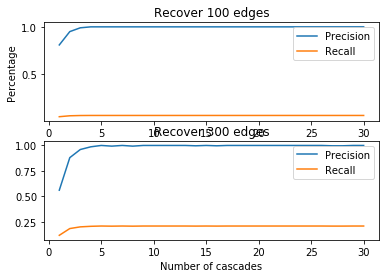

In [19]:
plt.subplot(2,1,1)
plt.plot(list(range(1,31)),precision_100,label = "Precision")
plt.plot(list(range(1,31)),recall_100,label = "Recall")
plt.legend()
plt.xlabel("Number of cascades")
plt.ylabel("Percentage")
plt.title("Recover 100 edges")

plt.subplot(2,1,2)
plt.plot(list(range(1,31)),precision_300,label = "Precision")
plt.plot(list(range(1,31)),recall_300,label = "Recall")
plt.legend()
plt.xlabel("Number of cascades")
plt.title("Recover 300 edges")
plt.show()



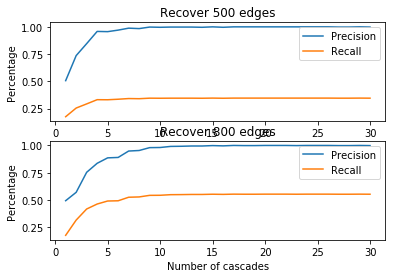

In [20]:
plt.subplot(2,1,1)
plt.plot(list(range(1,31)),precision_500,label = "Precision")
plt.plot(list(range(1,31)),recall_500,label = "Recall")
plt.legend()
plt.xlabel("Number of cascades")
plt.ylabel("Percentage")
plt.title("Recover 500 edges")


plt.subplot(2,1,2)
plt.plot(list(range(1,31)),precision_800,label = "Precision")
plt.plot(list(range(1,31)),recall_800,label = "Recall")
plt.legend()
plt.xlabel("Number of cascades")
plt.ylabel("Percentage")
plt.title("Recover 800 edges")
plt.show()


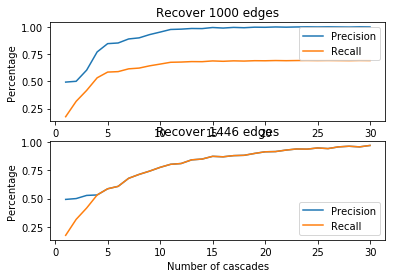

In [21]:
plt.subplot(2,1,1)
plt.plot(list(range(1,31)),precision_1000,label = "Precision")
plt.plot(list(range(1,31)),recall_1000,label = "Recall")
plt.legend()
plt.xlabel("Number of cascades")
plt.ylabel("Percentage")
plt.title("Recover 1000 edges")

plt.subplot(2,1,2)
plt.plot(list(range(1,31)),precision_1400,label = "Precision")
plt.plot(list(range(1,31)),recall_1400,label = "Recall")
plt.legend()
plt.xlabel("Number of cascades")
plt.ylabel("Percentage")
plt.title("Recover 1446 edges")
plt.show()

In [22]:
precision_1400

[0.49320388349514566,
 0.5005464480874317,
 0.5284837861524978,
 0.5325034578146611,
 0.5871369294605809,
 0.6085753803596127,
 0.6798063623789765,
 0.7143845089903181,
 0.7434301521438451,
 0.7766251728907331,
 0.8035961272475796,
 0.8105117565698479,
 0.843015214384509,
 0.8499308437067773,
 0.8741355463347165,
 0.8699861687413555,
 0.8803596127247579,
 0.8831258644536653,
 0.8997233748271093,
 0.9142461964038727,
 0.9163208852005532,
 0.9294605809128631,
 0.9391424619640387,
 0.9377593360995851,
 0.9481327800829875,
 0.9426002766251729,
 0.9578146611341632,
 0.9633471645919779,
 0.9578146611341632,
 0.9702627939142462]